In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("survey_responses.csv")

# Remove whitespace from column names
df.columns = df.columns.str.strip()

df = df.drop(columns=['Timestamp'])

# Merge age categories, replacing 'Under 18' and '18 – 20' with 'Under 20', because 'Under 18' has only 1 response
df['What is your age?'] = df['What is your age?'].replace({
    'Under 18': 'Under 20',
    '18 – 20': 'Under 20'
})

# Rename columns
question_texts = {f"Q{i+1}": col for i, col in enumerate(df.columns)}
df.columns = list(question_texts.keys())



In [101]:
question_types = {
    "Q1": "multiple choice",
    "Q2": "multiple choice",
    "Q3": "multiple choice",
    "Q4": "short answer",
    "Q5": "short answer",
    "Q6": "multiple choice",
    "Q7": "likert scale",
    "Q8": "checkbox",
    "Q9": "likert scale",
    "Q10": "checkbox",
    "Q11": "likert scale",
    "Q12": "likert scale",
    "Q13": "checkbox",
    "Q14": "multiple choice",
    "Q15": "multiple choice",
    "Q16": "checkbox",
    "Q17": "checkbox",
    "Q18": "likert scale",
    "Q19": "multiple choice",
    "Q20": "checkbox",
    "Q21": "open-ended",
    "Q22": "checkbox",
    "Q23": "multiple choice",
    "Q24": "likert scale",
    "Q25": "multiple choice",
    "Q26": "open-ended",
    "Q27": "multiple choice",
    "Q28": "multiple choice",
    "Q29": "multiple choice",
    "Q30": "multiple choice",
    "Q31": "multiple choice",
    "Q32": "likert scale",
    "Q33": "checkbox",
    "Q34": "likert scale",
    "Q35": "checkbox",
    "Q36": "open-ended",
    "Q37": "open-ended",
    "Q38": "open-ended"
}

# Table
rows = []
for q, text in question_texts.items():
    rows.append({
        "Q": q,
        "Type": question_types.get(q),
        "Text": text
    })

# Create DF
questions_df = pd.DataFrame(rows)
# questions_df # Uncomment to get a preview of the survey questions


In [102]:
# Map official option to relevant questions

official_options_map = {
    # multiple choice options
    "Q1": [
        "Under 20",
        "21 – 23",
        "24 – 26",
        "27 or older"
    ],
    "Q2": [
        "Female",
        "Male",
        "Non-binary",
        "Prefer not to say"
    ],
    "Q3": [
        "BTS",
        "Bachelor",
        "Master",
        "PhD or Doctoral studies"
    ],
    "Q6": [
        "None / I eat everything",
        "Vegetarian",
        "Vegan",
        "Halal",
        "Kosher",
        "Gluten-free",
        "Lactose-free",
        "Allergies or intolerances"
    ],
    "Q14": [
        "Yes, significantly",
        "Yes",
        "Only a bit",
        "Not at all"
    ],
    "Q15": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q19": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q23": [
        "I’d be more willing",
        "I’d be less willing",
        "It wouldn’t make a difference",
        "Not sure"
    ],
    "Q25": [
        "More likely",
        "Less likely",
        "No effect",
        "Not sure"
    ],
    "Q27": [
        "Yes, many times",
        "Yes, sometimes",
        "No, but I’ve used it for other topics",
        "No, I’ve never used tools like ChatGPT",
        "I’ve heard of them, but never tried them"
    ],
    "Q28": [
        "Yes",
        "No"
    ],
    "Q29": [
        "Yes, often",
        "Occasionally",
        "Rarely",
        "Never",
        "Not applicable / I don’t follow such preferences"
    ],
    "Q30": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q31": [
        "A chat-style conversation",
        "A form where I fill in options and get advice",
        "A mix of both",
        "Not sure"
    ],

    # checkbox options
    "Q8": [
        "I skip meals",
        "I crave unhealthy or comfort food",
        "I snack more often",
        "I eat at irregular times",
        "I eat healthier to stay focused",
        "No major changes"
    ],
    "Q10": [
        "Time availability",
        "Budget constraints",
        "Physical wellbeing",
        "Emotional state",
        "Social influence"
    ],
    "Q13": [
        "Nutritional goals",
        "Mood or emotional state",
        "Energy or focus levels",
        "Cultural food preferences",
        "Budget constraints",
        "Sleep or physical health",
        "Device data, like wearables",
        "Religious or ethical preferences",
        "Available time to cook or eat"
    ],
    "Q16": [
        "Adapts to my daily schedule or workload",
        "Considers my budget or what food I have",
        "Suggests quick meals when I'm busy",
        "Checks how I feel before suggesting food",
        "Lets me rate or respond to each recommendation"
    ],
    "Q17": [
        "Gentle reminders",
        "Motivational messages based on how I feel",
        "Tracking meals or consistency",
        "Celebrating small successes",
        "Healthier snack suggestions",
        "Setting flexible daily goals",
        "Challenges with friends or study groups"
    ],
    "Q20": [
        "It matches my dietary needs",
        "It reflects my mood or energy level",
        "It gives a scientific or nutritional reason for its suggestions",
        "It builds on what I’ve chosen before",
        "It uses friendly or human-like language",
        "It fits my current routine or schedule",
        "It allows me to give feedback on suggestions"
    ],
    "Q22": [
        "My dietary needs or preferences",
        "My stress levels",
        "My sleep patterns",
        "My daily schedule or class timetable",
        "My emotional state",
        "My budget",
        "Data from wearables or health trackers"
    ],
    "Q33": [
        "Pre-written templates to show how to ask a question",
        "Step-by-step help for making a request",
        "A helpful conversation that asks clarifying questions",
        "Automatic suggestions based on my situation, like time or stress level",
        "Easy ways to adjust or rewrite my request"
    ],
    "Q35": [
        "Rephrase my request and try again",
        "Ask a follow-up to clarify",
        "Stop using it and look elsewhere",
        "Not sure"
    ]
}


In [103]:
# Likert scale mappings for questions

likert_maps = {
    "Q7": {
        1: "Never",
        2: "Rarely",
        3: "Sometimes",
        4: "Often",
        5: "Always"
    },
    "Q9": {
        1: "Not difficult at all",
        2: "Slightly difficult",
        3: "Moderately difficult",
        4: "Very difficult",
        5: "Extremely difficult"
    },
    "Q11": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q12": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q18": {
        1: "Not at all",
        2: "Slightly",
        3: "Moderately",
        4: "Mostly",
        5: "Completely"
    },
    "Q24": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q32": {
        1: "Not confident at all",
        2: "Slightly confident",
        3: "Moderately confident",
        4: "Confident",
        5: "Very confident"
    },
    "Q34": {
        1: "Not at all",
        2: "Slightly",
        3: "Moderately",
        4: "Very",
        5: "Very much"
    }
}


In [104]:
# Function to process multiple choice questions

def process_multiple_choice(column, official_options):
    # Count all answers
    counts = df[column].value_counts(dropna=True)

    # Filter out "Other..."
    counts_filtered = counts[counts.index.isin(official_options)]
    other_answers = counts[~counts.index.isin(official_options)]

    return counts_filtered, other_answers


In [105]:
# Function to process checkbox questions using MultiLabelBinarizer

from sklearn.preprocessing import MultiLabelBinarizer

def process_checkbox(column, official_options):
    # Get a list of all values
    list_col = df[column].fillna('').str.split(';')

    # Create dummy variables
    mlb = MultiLabelBinarizer()
    dummies = pd.DataFrame(mlb.fit_transform(list_col),
                           columns=mlb.classes_,
                           index=list_col.index)
    
    # Variable for official options
    filtered = dummies[official_options]

    # Variable for "Other..." options
    others = set(mlb.classes_) - set(official_options)

    return filtered, others


In [106]:
# -------- RESULTS -------- #

Quantitative results for Q1
-----------------------
             Count    Percent
Q1                           
Under 20         9   8.256881
21 – 23         24  22.018349
24 – 26         48  44.036697
27 or older     28  25.688073
-----------------------


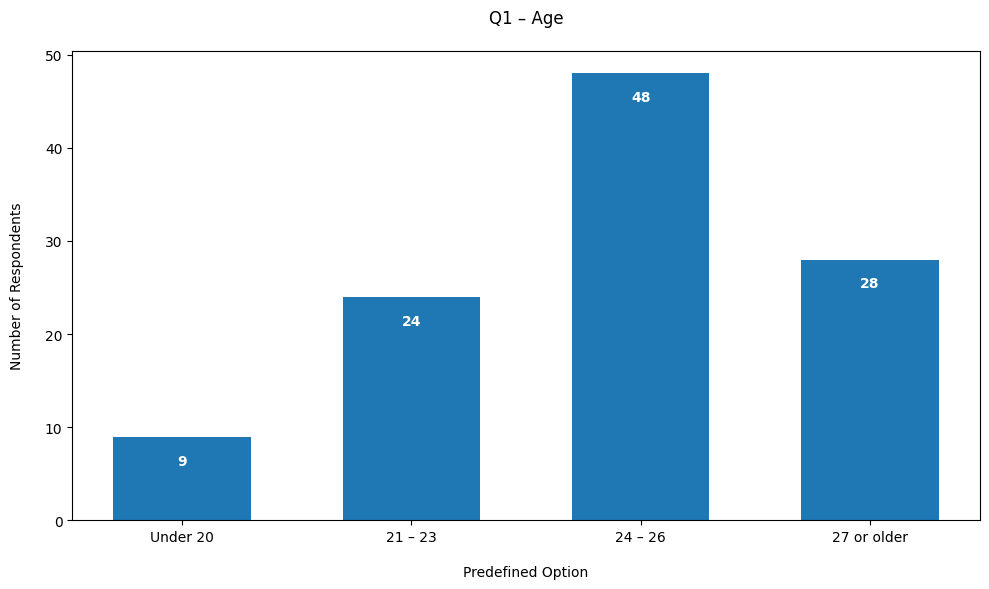

In [107]:
# Q1 – Age (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q1'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q1 – Age', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q2
-----------------------
                   Count    Percent
Q2                                 
Female                49  44.954128
Male                  57  52.293578
Non-binary             2   1.834862
Prefer not to say      1   0.917431
-----------------------


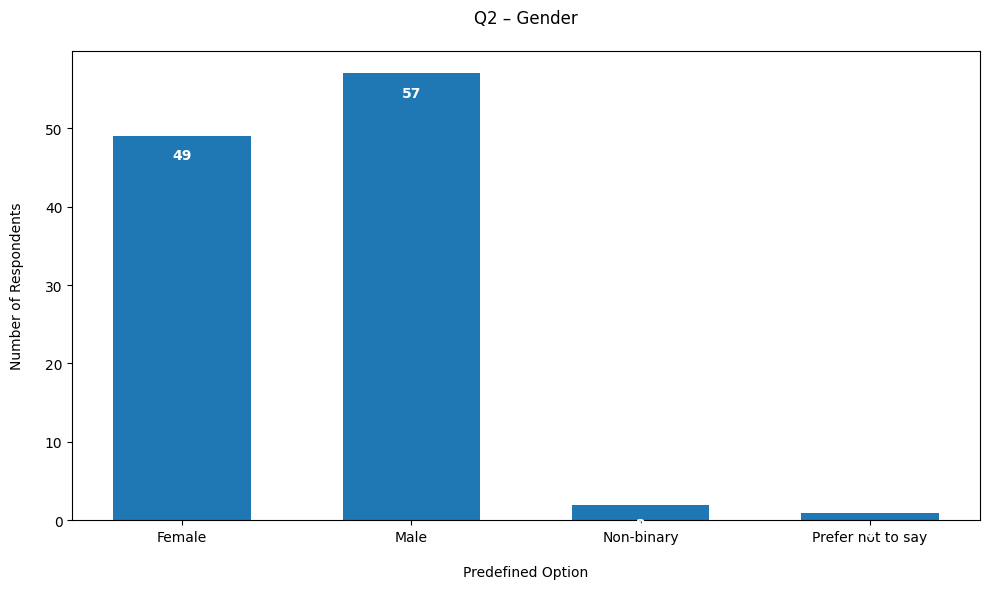

In [108]:
# Q2 – Gender (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q2'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print("-----------------------")
    print(f"\nOther answers from {qid}:")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q2 – Gender', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q3
-----------------------
                         Count    Percent
Q3                                       
BTS                          3   2.752294
Bachelor                    37  33.944954
Master                      59  54.128440
PhD or Doctoral studies     10   9.174312
-----------------------


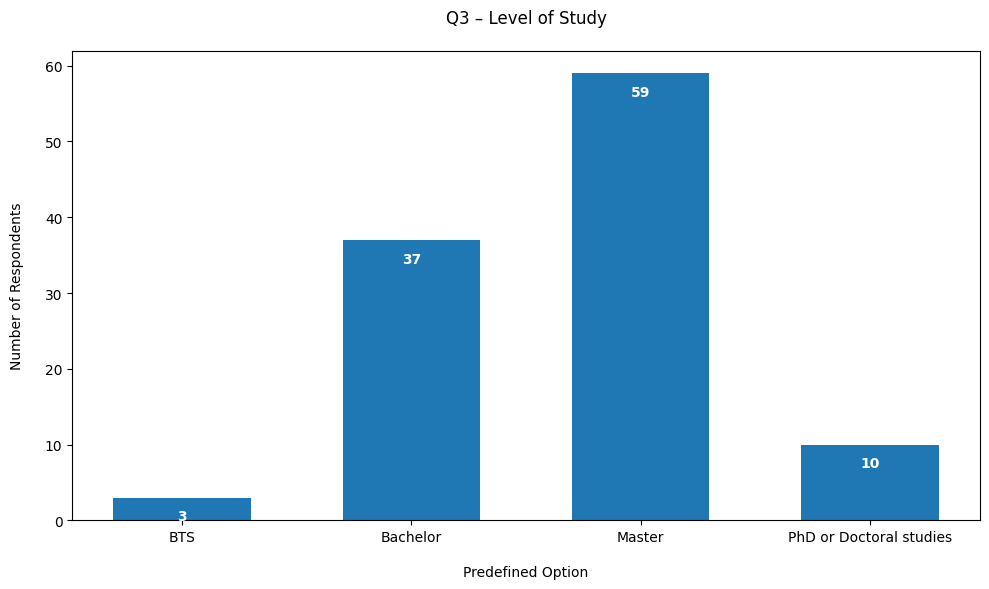

In [109]:
# Q3 – Level of Study (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q3'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q3 – Level of Study', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q4
-----------------------
                              Count    Percent
Q4                                            
STEM                             46  42.201835
Health & Life Sciences           24  22.018349
Business & Economics             20  18.348624
Social Sciences & Humanities     12  11.009174
Creative & Design                 3   2.752294
-----------------------


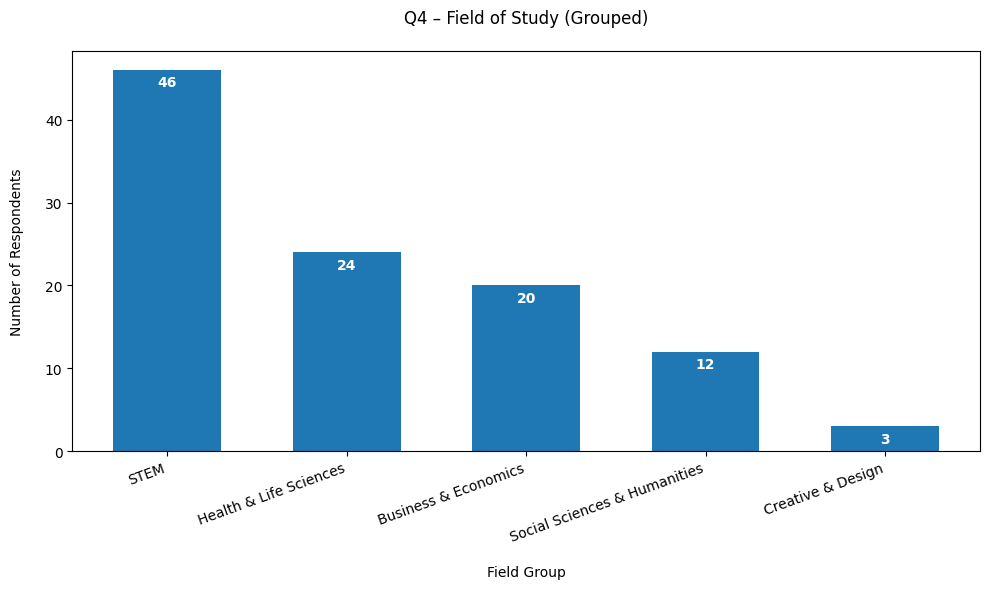

In [110]:
# Q4 – Field of Study (Short Answer)
# Not Setuped
# Not finished

qid = 'Q4'

q4_clean = df[qid].dropna().str.strip()

field_map = {
    # STEM
    'Computer Science': 'STEM',
    'Mathematics': 'STEM',
    'IT': 'STEM',
    'Informatics': 'STEM',
    'Computer Engineering': 'STEM',
    'Data Science': 'STEM',
    'Neuromorphic Computing': 'STEM',
    'HPC': 'STEM',
    'Physics': 'STEM',
    'Civil Engineering': 'STEM',
    'Environmental Engineering': 'STEM',
    'Computational Biology': 'STEM',
    'Computational Linguistics': 'STEM',
    'Game Design & Development': 'STEM',

    # Health & Life Sciences
    'Sport and Exercise Science': 'Health & Life Sciences',
    'Sport Management': 'Health & Life Sciences',
    'Sport Management and Digitalisation': 'Health & Life Sciences',
    'Physiotherapy': 'Health & Life Sciences',
    'Nursing': 'Health & Life Sciences',
    'Biology': 'Health & Life Sciences',
    'Nutrition': 'Health & Life Sciences',
    'Nutrition Sciences': 'Health & Life Sciences',
    'Nutrition, Fitness & Health': 'Health & Life Sciences',

    # Business & Economics
    'Economics': 'Business & Economics',
    'Finance': 'Business & Economics',
    'Accounting': 'Business & Economics',
    'Accounting and Audit': 'Business & Economics',
    'Finance and Economics': 'Business & Economics',
    'Global Business': 'Business & Economics',
    'Innovation and Entrepreneurship': 'Business & Economics',
    'Digital Business and Innovation': 'Business & Economics',
    'Master in Management': 'Business & Economics',
    'Entrepreneurship': 'Business & Economics',
    'Management and Service Engineering': 'Business & Economics',
    'Human Resources Management': 'Business & Economics',

    # Social Sciences & Humanities
    'History': 'Social Sciences & Humanities',
    'German and History (Master of Education)': 'Social Sciences & Humanities',
    'Social Sciences': 'Social Sciences & Humanities',
    'Education': 'Social Sciences & Humanities',
    'Applied Linguistics': 'Social Sciences & Humanities',
    'Translation and Multilingual Communication': 'Social Sciences & Humanities',
    'English Literature': 'Social Sciences & Humanities',
    'Medieval and Early Modern Studies': 'Social Sciences & Humanities',
    'Design & Language (2BAs)': 'Social Sciences & Humanities',

    # Creative & Design
    'Graphics Design': 'Creative & Design',
    'Creative Writing': 'Creative & Design',
    'Media': 'Creative & Design',
}

q4_grouped = q4_clean.map(field_map)

# Counts
counts = q4_grouped.value_counts()
percent = counts / len(q4_grouped) * 100
q4_grouped_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(q4_grouped_results)
print("-----------------------")

# Plot
plt.figure(figsize=(10,6))
plt.bar(q4_grouped_results.index, q4_grouped_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q4 – Field of Study (Grouped)', pad=20)
plt.xlabel('Field Group', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=20, ha='right')

# Add values on bars
for i, v in enumerate(q4_grouped_results['Count']):
    plt.text(i, v - 2, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Export to CSV
q4_clean.to_csv(f"{qid}_results.csv")


Quantitative results for Q5
-----------------------
                Count    Percent
Q5                              
Luxembourg         80  73.394495
Portugal            7   6.422018
Germany             6   5.504587
Belgium             6   5.504587
France              5   4.587156
United Kingdom      3   2.752294
Switzerland         1   0.917431
Netherlands         1   0.917431
-----------------------


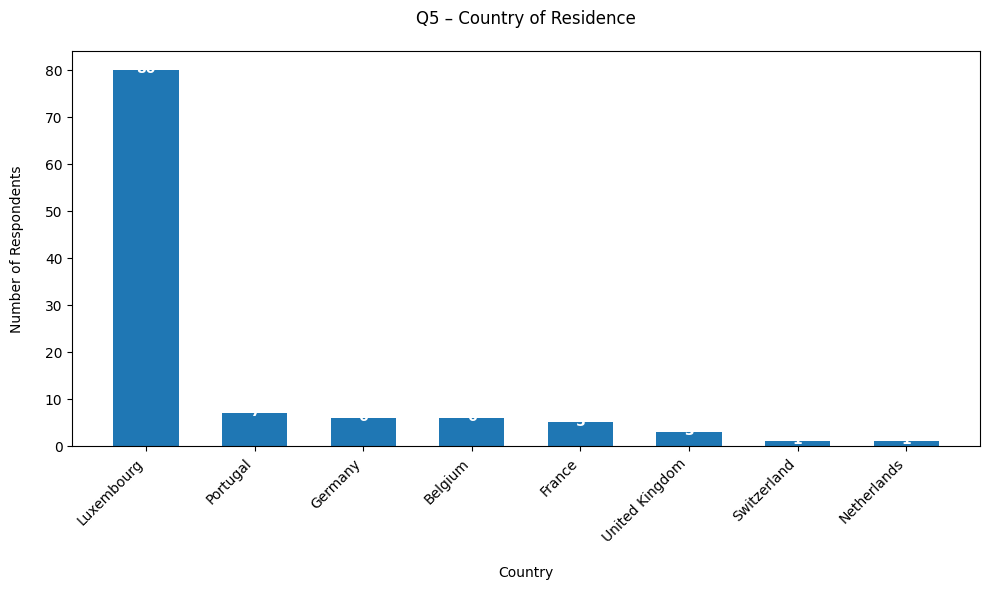

In [111]:
# Q5 – Country of Residence (Short Answer)
# Not Setuped
# Not finished

qid = 'Q5'

q5_clean = df[qid].dropna().str.strip()

# Counts and percentages
counts = q5_clean.value_counts()
percent = counts / len(q5_clean) * 100
q5_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(q5_results)
print("-----------------------")

# Plot
plt.figure(figsize=(10,6))
plt.bar(q5_results.index, q5_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q5 – Country of Residence', pad=20)
plt.xlabel('Country', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=45, ha='right')

# Add values on bars
for i, v in enumerate(q5_results['Count']):
    plt.text(i, v - 0.5, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q6
-----------------------
                           Count    Percent
Q6                                         
None / I eat everything       77  78.571429
Vegetarian                     9   9.183673
Vegan                          0   0.000000
Halal                          6   6.122449
Kosher                         0   0.000000
Gluten-free                    0   0.000000
Lactose-free                   0   0.000000
Allergies or intolerances      6   6.122449
-----------------------

Other answers from Q6:
-----------------------
Lactose-Free
Gluten and Lactose Free
I don't eat fish.
Intermittent fasting (16-8)
Gluten free and allergies
90% Single ingedrient(Animal based mostly)
Autistic Eating Habits
-----------------------


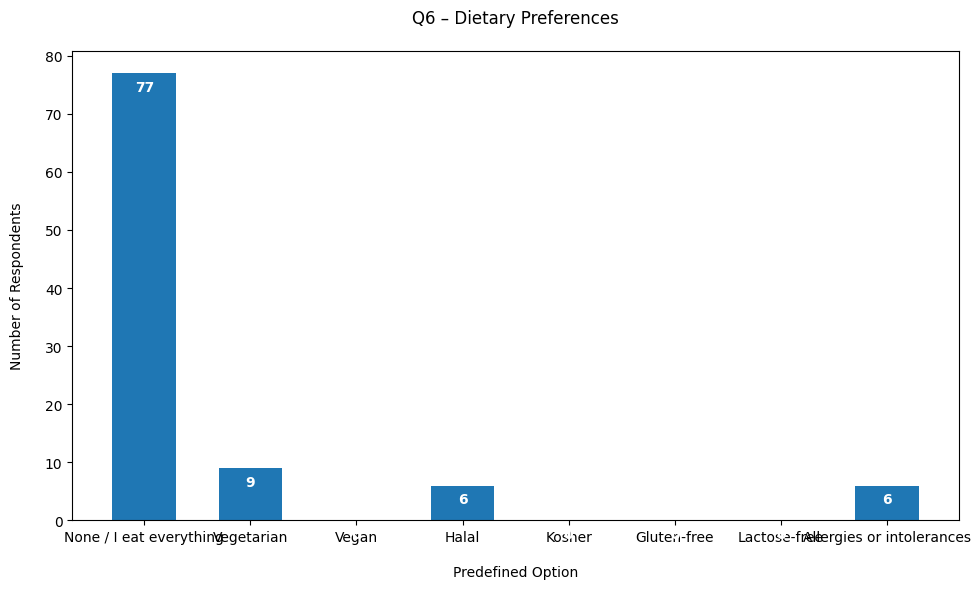

In [112]:
# Q6 – Dietary Preferences (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q6'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q6 – Dietary Preferences', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q7
-----------------------
            Count    Percent
Q7_labeled                  
Never          11   9.734513
Rarely         17  15.044248
Sometimes      25  22.123894
Often          34  30.088496
Always         22  19.469027
-----------------------


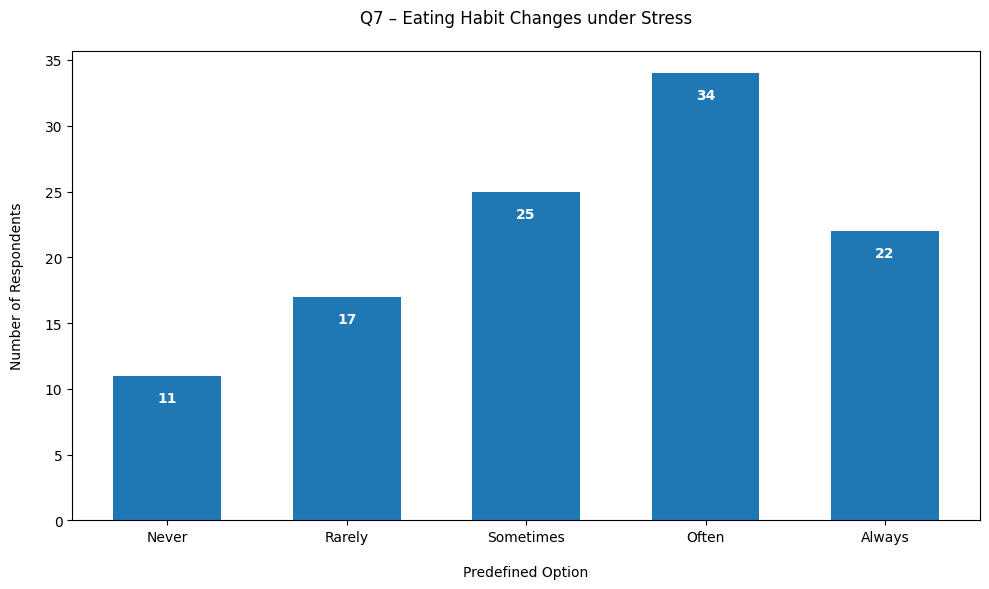

In [113]:
# Q7 – Eating Habit Changes under Stress (Likert Scale)
# Not Setuped
# Not finished

qid = 'Q7'

# Map the Likert scale options to the DataFrame
df[f'{qid}_labeled'] = pd.Categorical(
    df[qid].map(likert_maps[qid]),
    categories=list(likert_maps[qid].values()),
    ordered=True
)

# Counts
counts = df[f'{qid}_labeled'].value_counts().sort_index()
percent = counts / len(df) * 100
likert_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(likert_results)
print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(likert_results.index, likert_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q7 – Eating Habit Changes under Stress', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(likert_results['Count']):
    plt.text(i, v - 2, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q8
-----------------------
                                   Count    Percent
I snack more often                    56  52.830189
I eat at irregular times              54  50.943396
I crave unhealthy or comfort food     51  48.113208
I skip meals                          35  33.018868
No major changes                      13  12.264151
I eat healthier to stay focused        5   4.716981
-----------------------

Other answers from Q8:
-----------------------

Less appetite
I eat snacks as real meals 
I eat food that‘s much quicker to prepare and therefore often less healthy like frozen pizza or instant noodles
Binge Eating
-----------------------


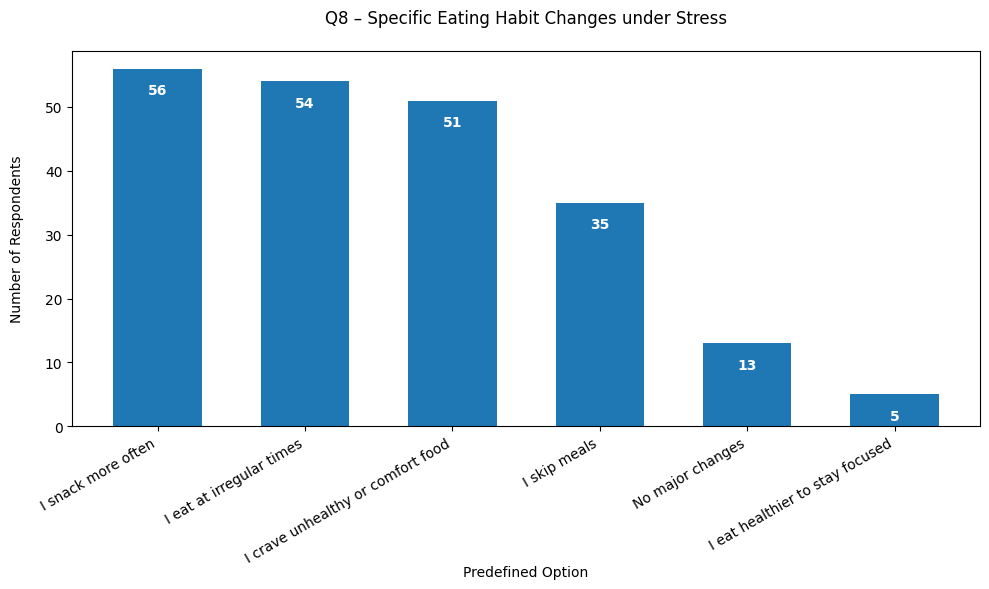

In [114]:
# Q8 – Specific Eating Habit Changes under Stress (Checkboxes)
# Not finished

qid = 'Q8'

filtered, others = process_checkbox(qid, official_options_map[qid])

# Add dummies to the original DataFrame
df = pd.concat([df, filtered], axis=1)

# Count the number of respondents who selected at least one predefined option
respondents_predefined = (filtered.sum(axis=1) > 0).sum()

# Counts
counts = filtered.sum().sort_values(ascending=False)
percent = counts / respondents_predefined * 100
cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(cb_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others:
        print(answer)

    pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(cb_results.index, cb_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q8 – Specific Eating Habit Changes under Stress', pad=20)
plt.xlabel('Predefined Option', labelpad=0)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=30, ha='right')

# Add values on bars
for i, v in enumerate(cb_results['Count']):
    plt.text(i, v - 4, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q9
-----------------------
                      Count    Percent
Q9_labeled                            
Not difficult at all     11   9.734513
Slightly difficult       25  22.123894
Moderately difficult     26  23.008850
Very difficult           31  27.433628
Extremely difficult      16  14.159292
-----------------------


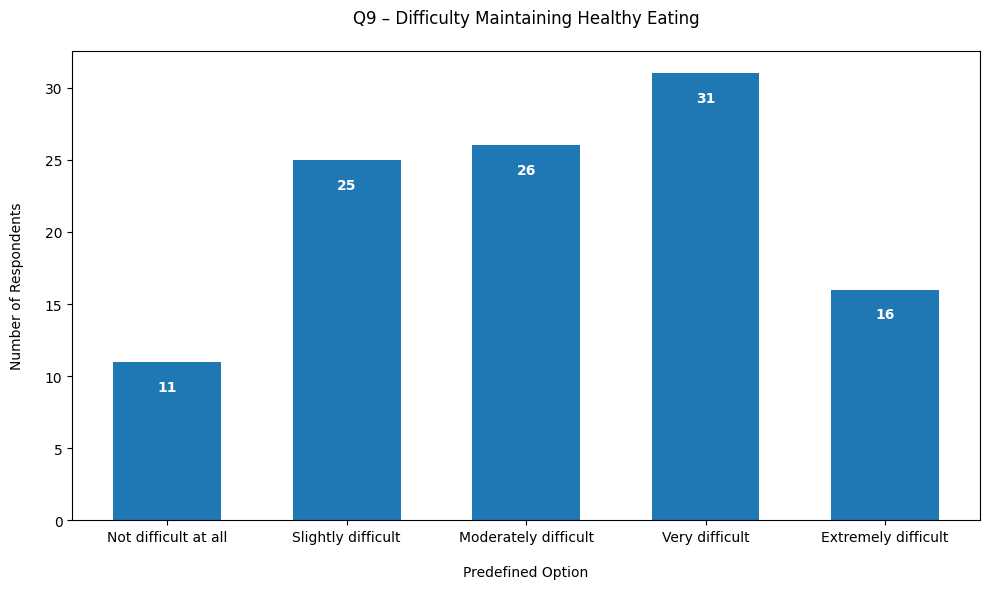

In [115]:
# Q9 – Difficulty Maintaining Healthy Eating (Likert Scale)
# Not finished

qid = 'Q9'

# Map the Likert scale options to the DataFrame
df[f'{qid}_labeled'] = pd.Categorical(
    df[qid].map(likert_maps[qid]),
    categories=list(likert_maps[qid].values()),
    ordered=True
)

# Counts
counts = df[f'{qid}_labeled'].value_counts().sort_index()
percent = counts / len(df) * 100
likert_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(likert_results)
print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(likert_results.index, likert_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q9 – Difficulty Maintaining Healthy Eating', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(likert_results['Count']):
    plt.text(i, v - 2, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q10
-----------------------
                    Count    Percent
Time availability      81  71.681416
Emotional state        67  59.292035
Physical wellbeing     22  19.469027
Budget constraints     20  17.699115
Social influence       14  12.389381
-----------------------

Other answers from Q10:
-----------------------

Food Reliability
-----------------------


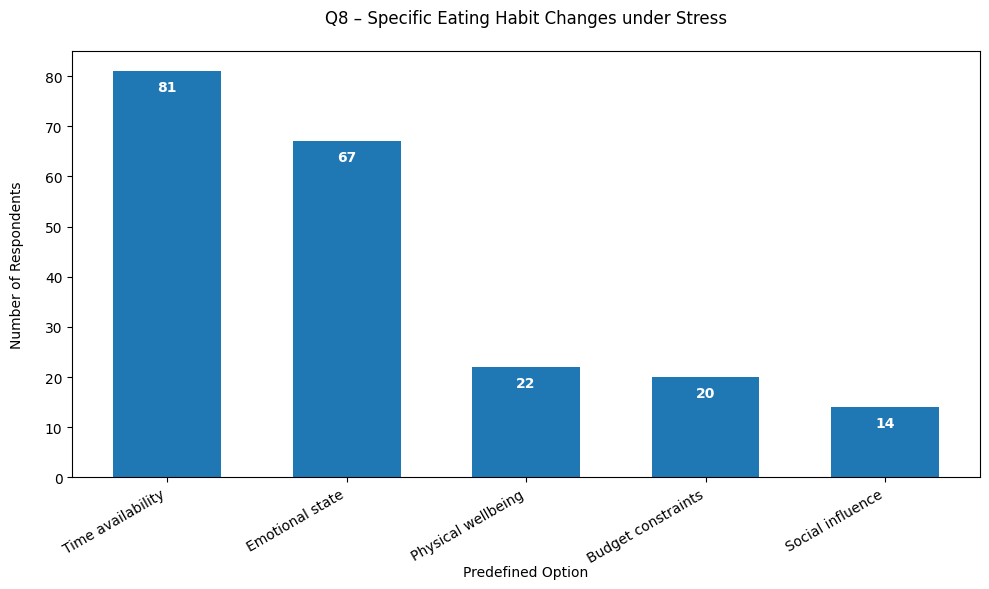

In [116]:
# Q10 – Influencing Factors under Stress (Checkboxes)
# Not Setuped
# Not finished

qid = 'Q10'

filtered, others = process_checkbox(qid, official_options_map[qid])

# Add dummies to the original DataFrame
df = pd.concat([df, filtered], axis=1)

# Count the number of respondents who selected at least one predefined option
respondents_predefined = (filtered.sum(axis=1) > 0).sum()

# Counts
counts = filtered.sum().sort_values(ascending=False)
percent = counts / len(df) * 100
cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(cb_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others:
        print(answer)

    pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(cb_results.index, cb_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q8 – Specific Eating Habit Changes under Stress', pad=20)
plt.xlabel('Predefined Option', labelpad=0)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=30, ha='right')

# Add values on bars
for i, v in enumerate(cb_results['Count']):
    plt.text(i, v - 4, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q11
-----------------------
                      Count    Percent
Q11_labeled                           
Not important            13  11.504425
Slightly important       12  10.619469
Moderately important     35  30.973451
Important                28  24.778761
Very important           21  18.584071
-----------------------


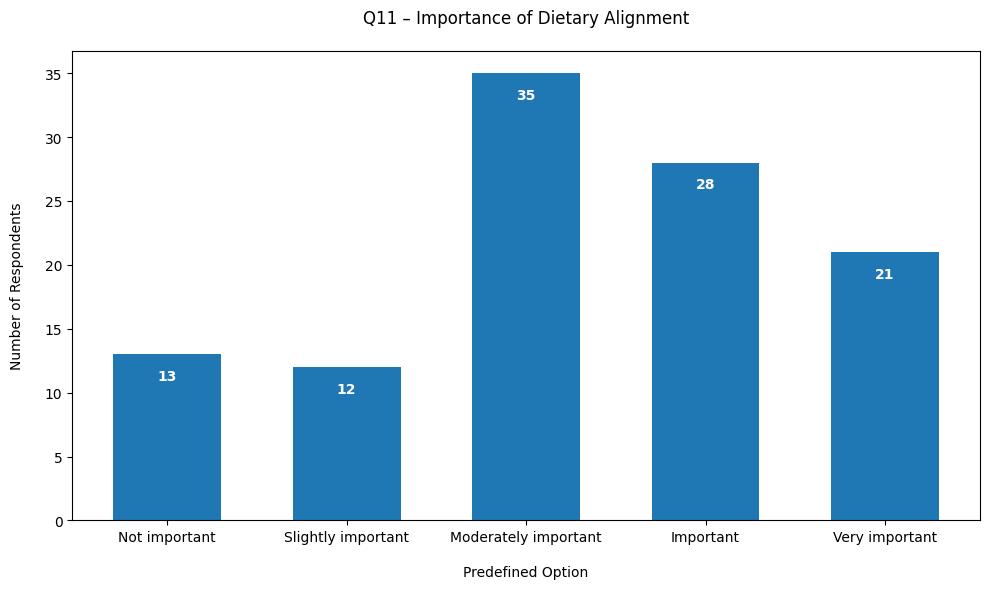

In [117]:
# Q11 – Importance of Dietary Alignment (Likert Scale)
# Not Setuped
# Not finished

qid = 'Q11'

# Map the Likert scale options to the DataFrame
df[f'{qid}_labeled'] = pd.Categorical(
    df[qid].map(likert_maps[qid]),
    categories=list(likert_maps[qid].values()),
    ordered=True
)

# Counts
counts = df[f'{qid}_labeled'].value_counts().sort_index()
percent = counts / len(df) * 100
likert_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(likert_results)
print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(likert_results.index, likert_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q11 – Importance of Dietary Alignment', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(likert_results['Count']):
    plt.text(i, v - 2, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q12
-----------------------
                      Count    Percent
Q12_labeled                           
Not important            10   8.849558
Slightly important       18  15.929204
Moderately important     36  31.858407
Important                30  26.548673
Very important           15  13.274336
-----------------------


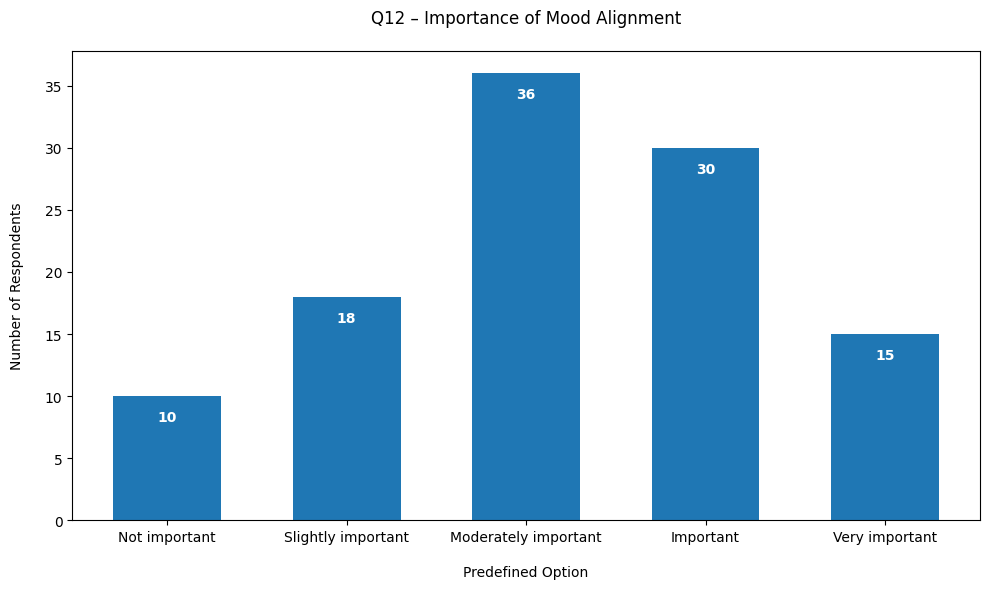

In [118]:
# Q12 – Importance of Mood Alignment (Likert Scale)
# Not Setuped
# Not finished

qid = 'Q12'

# Map the Likert scale options to the DataFrame
df[f'{qid}_labeled'] = pd.Categorical(
    df[qid].map(likert_maps[qid]),
    categories=list(likert_maps[qid].values()),
    ordered=True
)

# Counts
counts = df[f'{qid}_labeled'].value_counts().sort_index()
percent = counts / len(df) * 100
likert_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(likert_results)
print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(likert_results.index, likert_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q12 – Importance of Mood Alignment', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(likert_results['Count']):
    plt.text(i, v - 2, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q13
-----------------------
                                  Count    Percent
Nutritional goals                    70  61.946903
Available time to cook or eat        66  58.407080
Energy or focus levels               59  52.212389
Budget constraints                   47  41.592920
Sleep or physical health             43  38.053097
Mood or emotional state              35  30.973451
Cultural food preferences            15  13.274336
Religious or ethical preferences     11   9.734513
Device data, like wearables           4   3.539823
-----------------------

Other answers from Q13:
-----------------------

-----------------------


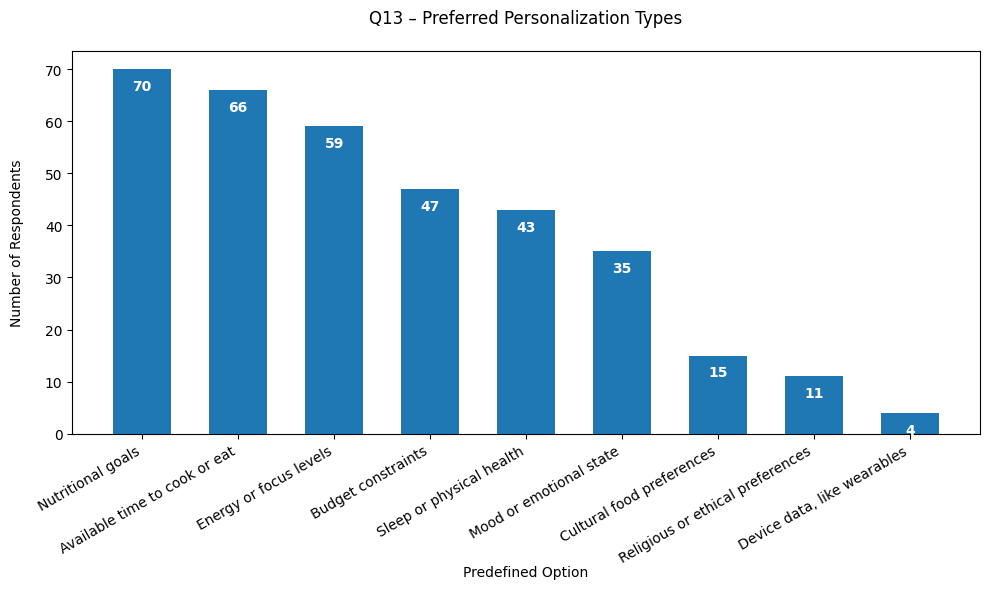

In [119]:
# Q13 – Preferred Personalization Types (Checkboxes)
# Not Setuped
# Not finished

qid = 'Q13'

filtered, others = process_checkbox(qid, official_options_map[qid])

# Add dummies to the original DataFrame
df = pd.concat([df, filtered], axis=1)

# Count the number of respondents who selected at least one predefined option
respondents_predefined = (filtered.sum(axis=1) > 0).sum()

# Counts
counts = filtered.sum().sort_values(ascending=False)
percent = counts / len(df) * 100
cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(cb_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others:
        print(answer)

    pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(cb_results.index, cb_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q13 – Preferred Personalization Types', pad=20)
plt.xlabel('Predefined Option', labelpad=0)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=30, ha='right')

# Add values on bars
for i, v in enumerate(cb_results['Count']):
    plt.text(i, v - 4, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q14
-----------------------
                    Count    Percent
Q14                                 
Yes, significantly     30  27.522936
Yes                    41  37.614679
Only a bit             28  25.688073
Not at all             10   9.174312
-----------------------


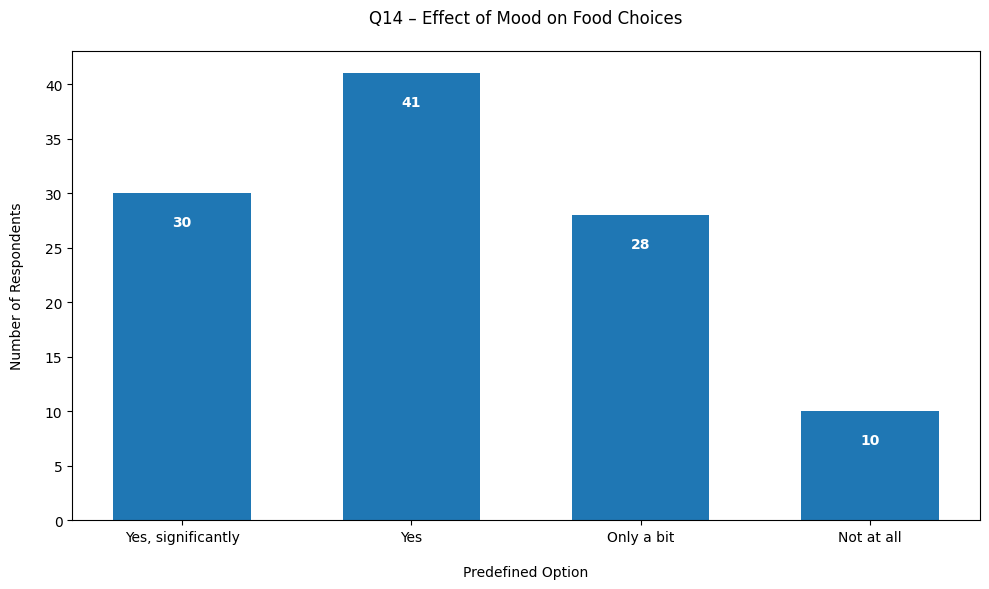

In [120]:
# Q14 – Effect of Mood on Food Choices (Multiple Choice)
# Not finished

qid = 'Q14'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q14 – Effect of Mood on Food Choices', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q15
-----------------------
          Count    Percent
Q15                       
Yes          67  62.037037
No            5   4.629630
Not sure     36  33.333333
-----------------------
-----------------------

Other answers from Q15:
I dont understand
-----------------------


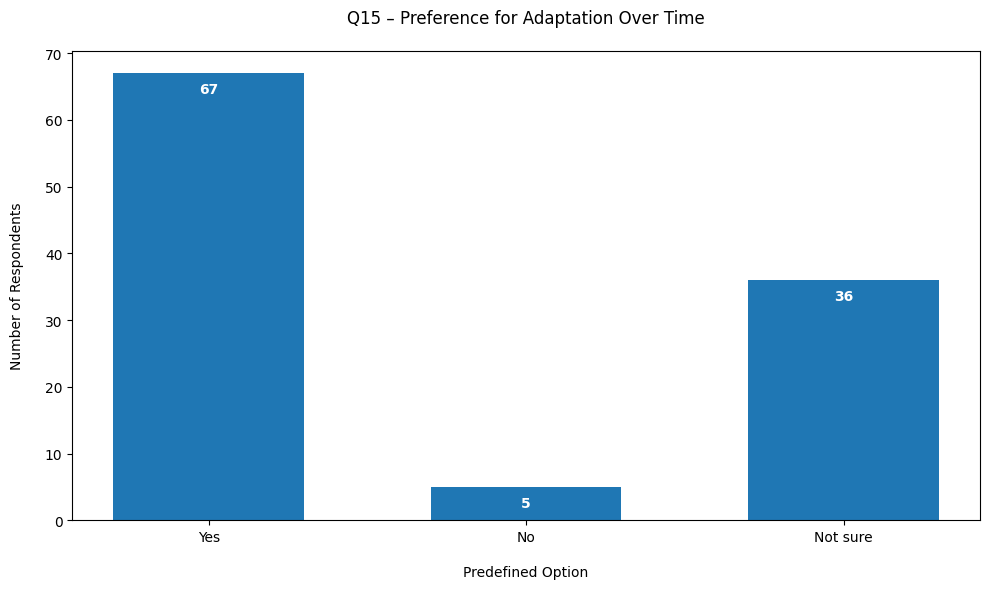

In [121]:
# Q15 – Preference for Adaptation Over Time (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q15'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print("-----------------------")
    print(f"\nOther answers from {qid}:")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q15 – Preference for Adaptation Over Time', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q16
-----------------------
                                                Count    Percent
Considers my budget or what food I have            72  63.716814
Suggests quick meals when I'm busy                 72  63.716814
Adapts to my daily schedule or workload            69  61.061947
Lets me rate or respond to each recommendation     50  44.247788
Checks how I feel before suggesting food           26  23.008850
-----------------------

Other answers from Q16:
-----------------------

-----------------------


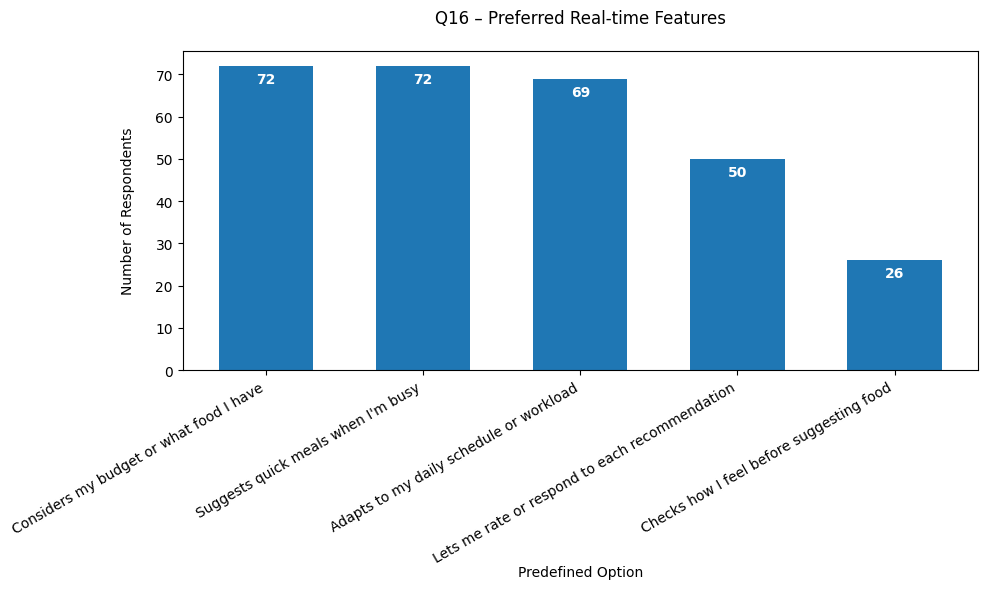

In [122]:
# Q16 – Preferred Real-time Features (Checkboxes)
# Not Setuped
# Not finished

qid = 'Q16'

filtered, others = process_checkbox(qid, official_options_map[qid])

# Add dummies to the original DataFrame
df = pd.concat([df, filtered], axis=1)

# Count the number of respondents who selected at least one predefined option
respondents_predefined = (filtered.sum(axis=1) > 0).sum()

# Counts
counts = filtered.sum().sort_values(ascending=False)
percent = counts / len(df) * 100
cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(cb_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others:
        print(answer)

    pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(cb_results.index, cb_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q16 – Preferred Real-time Features', pad=20)
plt.xlabel('Predefined Option', labelpad=0)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=30, ha='right')

# Add values on bars
for i, v in enumerate(cb_results['Count']):
    plt.text(i, v - 4, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q17
-----------------------
                                           Count    Percent
Healthier snack suggestions                   66  58.407080
Tracking meals or consistency                 57  50.442478
Setting flexible daily goals                  48  42.477876
Gentle reminders                              38  33.628319
Celebrating small successes                   34  30.088496
Challenges with friends or study groups       26  23.008850
Motivational messages based on how I feel     25  22.123894
-----------------------

Other answers from Q17:
-----------------------

Help with weekly shopping and meal prep
Warning on calories/number of snack consumed 
-----------------------


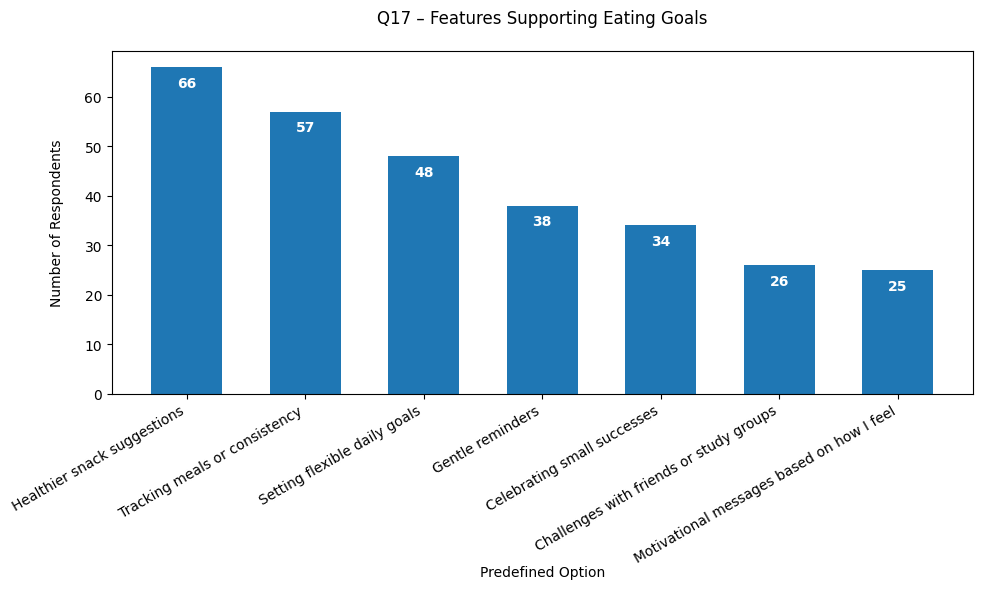

In [123]:
# Q17 – Features Supporting Eating Goals (Checkboxes)
# Not Setuped
# Not finished

qid = 'Q17'

filtered, others = process_checkbox(qid, official_options_map[qid])

# Add dummies to the original DataFrame
df = pd.concat([df, filtered], axis=1)

# Count the number of respondents who selected at least one predefined option
respondents_predefined = (filtered.sum(axis=1) > 0).sum()

# Counts
counts = filtered.sum().sort_values(ascending=False)
percent = counts / len(df) * 100
cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(cb_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others:
        print(answer)

    pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(cb_results.index, cb_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q17 – Features Supporting Eating Goals', pad=20)
plt.xlabel('Predefined Option', labelpad=0)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=30, ha='right')

# Add values on bars
for i, v in enumerate(cb_results['Count']):
    plt.text(i, v - 4, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q18
-----------------------
             Count    Percent
Q18_labeled                  
Not at all      11   9.734513
Slightly        15  13.274336
Moderately      36  31.858407
Mostly          34  30.088496
Completely      13  11.504425
-----------------------


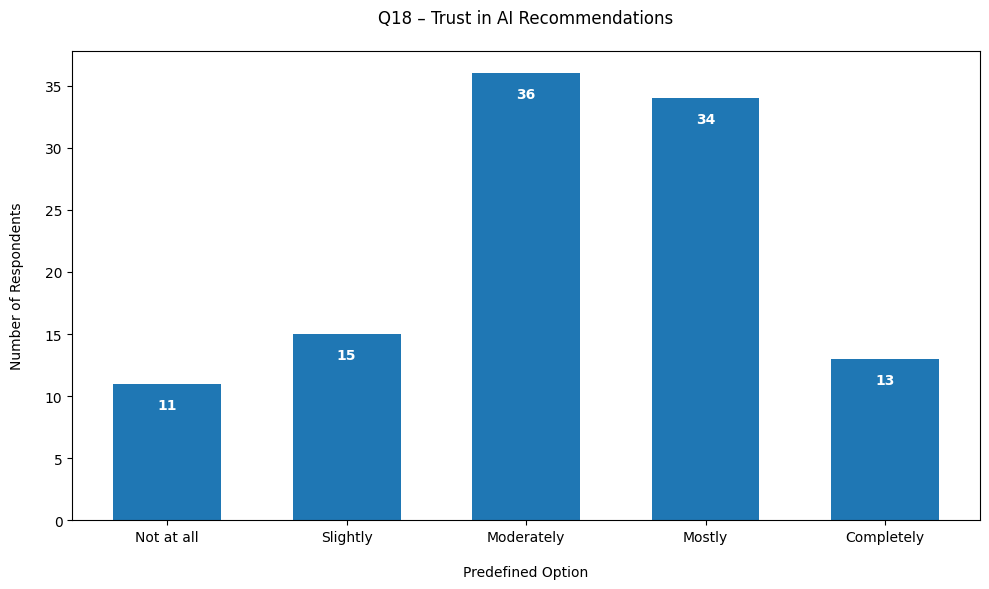

In [124]:
# Q18 – Trust in AI Recommendations (Likert Scale)
# Not Setuped
# Not finished

qid = 'Q18'

# Map the Likert scale options to the DataFrame
df[f'{qid}_labeled'] = pd.Categorical(
    df[qid].map(likert_maps[qid]),
    categories=list(likert_maps[qid].values()),
    ordered=True
)

# Counts
counts = df[f'{qid}_labeled'].value_counts().sort_index()
percent = counts / len(df) * 100
likert_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(likert_results)
print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(likert_results.index, likert_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q18 – Trust in AI Recommendations', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(likert_results['Count']):
    plt.text(i, v - 2, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q19
-----------------------
          Count    Percent
Q19                       
Yes          82  75.925926
No            8   7.407407
Not sure     18  16.666667
-----------------------

Other answers from Q19:
-----------------------
It depends, I has to make sense in order for me to follow
-----------------------


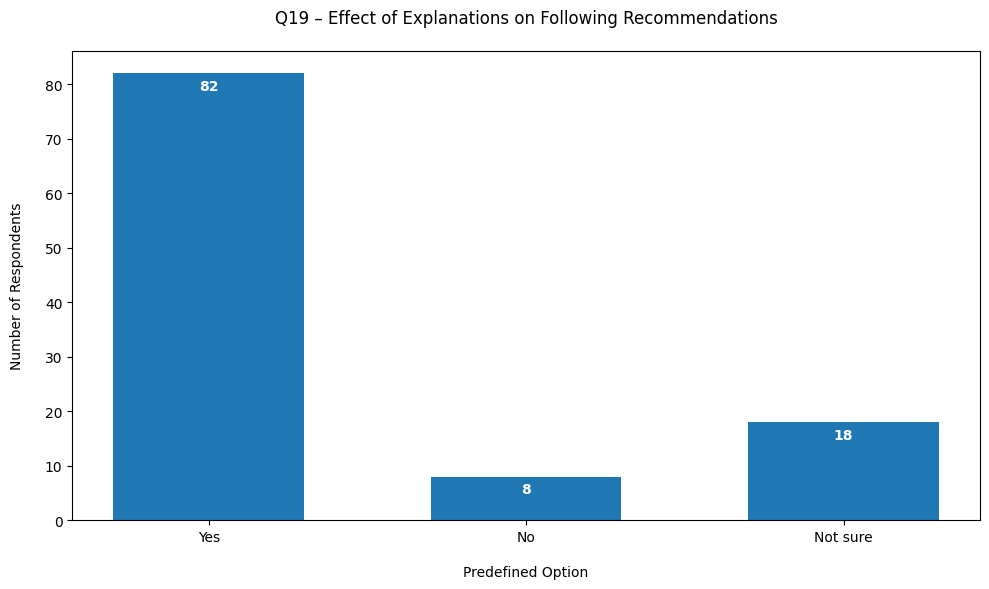

In [125]:
# Q19 – Effect of Explanations on Following Recommendations (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q19'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q19 – Effect of Explanations on Following Recommendations', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q20
-----------------------
                                                    Count    Percent
It gives a scientific or nutritional reason for...     67  59.292035
It fits my current routine or schedule                 57  50.442478
It allows me to give feedback on suggestions           56  49.557522
It matches my dietary needs                            54  47.787611
It builds on what I’ve chosen before                   51  45.132743
It reflects my mood or energy level                    29  25.663717
It uses friendly or human-like language                28  24.778761
-----------------------

Other answers from Q20:
-----------------------

I won't in any case
It gives me the precise macros and calories
It is a first step into researching food suggestions based on my demands
None, if I want to roll dice for food, I can do that without wasting water and energy.
Nothing really. I am principally against the use of AI. If you want to know something, go do the 

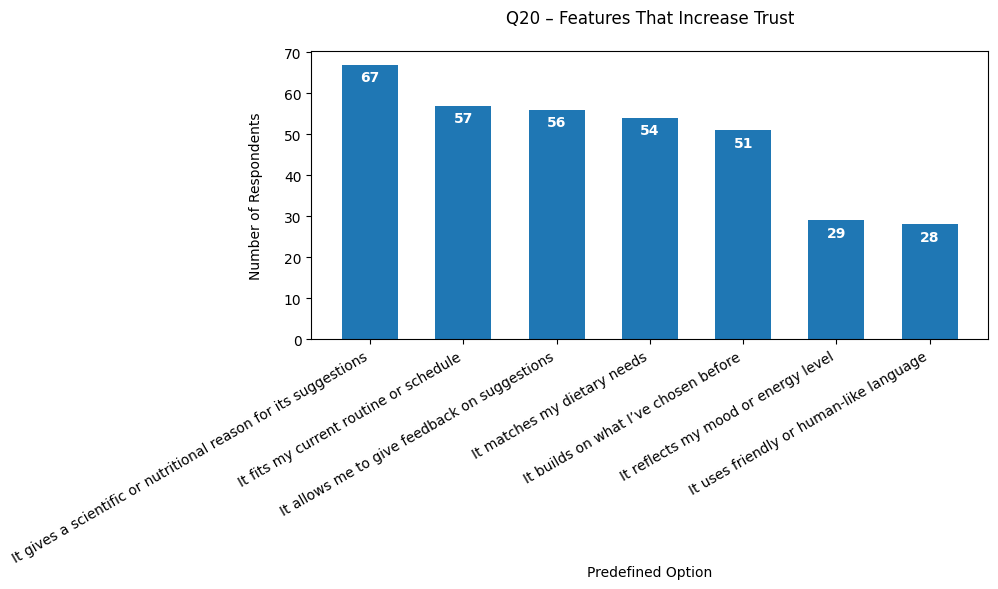

In [126]:
# Q20 – Features That Increase Trust (Checkboxes)
# Not Setuped
# Not finished

qid = 'Q20'

filtered, others = process_checkbox(qid, official_options_map[qid])

# Add dummies to the original DataFrame
df = pd.concat([df, filtered], axis=1)

# Count the number of respondents who selected at least one predefined option
respondents_predefined = (filtered.sum(axis=1) > 0).sum()

# Counts
counts = filtered.sum().sort_values(ascending=False)
percent = counts / len(df) * 100
cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(cb_results)
print("-----------------------")

print(f"\nOther answers from {qid}:")
print("-----------------------")
for answer in others:
    print(answer)

pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(cb_results.index, cb_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q20 – Features That Increase Trust', pad=20)
plt.xlabel('Predefined Option', labelpad=0)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=30, ha='right')

# Add values on bars
for i, v in enumerate(cb_results['Count']):
    plt.text(i, v - 4, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


In [127]:
# Q21 - Stress Effect on Trust (Open-ended)
# Not Setuped
# Not finished

qid = 'Q21'

answers = df[qid].dropna().str.strip()
answers = answers[~answers.str.match(r'^[\.\,\-\/\s]*$')]

print(f"{len(answers)} responses for {qid}")

answers.to_csv(f"{qid}_cleaned.csv", index=False)


61 responses for Q21


Quantitative results for Q22
-----------------------
                                        Count    Percent
My dietary needs or preferences            91  80.530973
My budget                                  67  59.292035
My daily schedule or class timetable       63  55.752212
My stress levels                           51  45.132743
My sleep patterns                          42  37.168142
My emotional state                         32  28.318584
Data from wearables or health trackers     29  25.663717
-----------------------

Other answers from Q22:
-----------------------

No data
Religious fasting periods
None. 
-----------------------


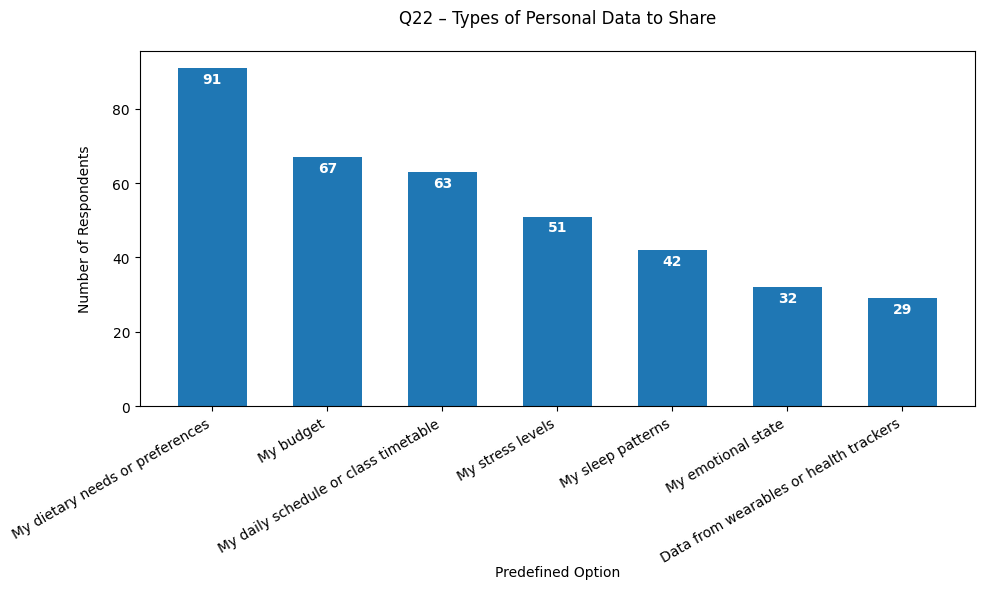

In [128]:
# Q22 – Types of Personal Data to Share (Checkboxes)
# Not Setuped
# Not finished

qid = 'Q22'

filtered, others = process_checkbox(qid, official_options_map[qid])

# Add dummies to the original DataFrame
df = pd.concat([df, filtered], axis=1)

# Count the number of respondents who selected at least one predefined option
respondents_predefined = (filtered.sum(axis=1) > 0).sum()

# Counts
counts = filtered.sum().sort_values(ascending=False)
percent = counts / len(df) * 100
cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(cb_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others:
        print(answer)

    pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(cb_results.index, cb_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q22 – Types of Personal Data to Share', pad=20)
plt.xlabel('Predefined Option', labelpad=0)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=30, ha='right')

# Add values on bars
for i, v in enumerate(cb_results['Count']):
    plt.text(i, v - 4, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q23
-----------------------
                               Count    Percent
Q23                                            
I’d be more willing               29  27.884615
I’d be less willing               25  24.038462
It wouldn’t make a difference     35  33.653846
Not sure                          15  14.423077
-----------------------

Other answers from Q23:
-----------------------
Would be fine if both parties are fully aware of what they're sharing to one another.
Depends on how this is handled. Stored locally and only accessed to help me, then im completely fine with it. I would be more reserved if it is data on a centralized server etc.
It depends, if the information is stored locally and we have access to it, then I am happy to share it. However, if it not locally available it would make me question with whom it is being shared with.
Depends if it's stored locally or stored on cloud
Depends on the terms and conditions
-----------------------


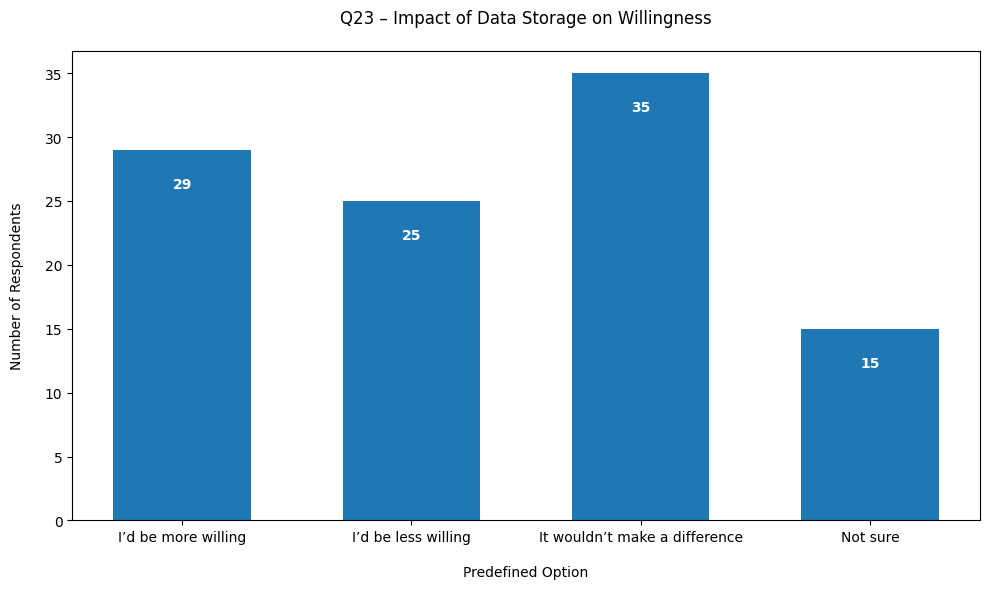

In [129]:
# Q23 – Impact of Data Storage on Willingness (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q23'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q23 – Impact of Data Storage on Willingness', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q24
-----------------------
                      Count    Percent
Q24_labeled                           
Not important             4   3.539823
Slightly important        6   5.309735
Moderately important     15  13.274336
Important                21  18.584071
Very important           63  55.752212
-----------------------


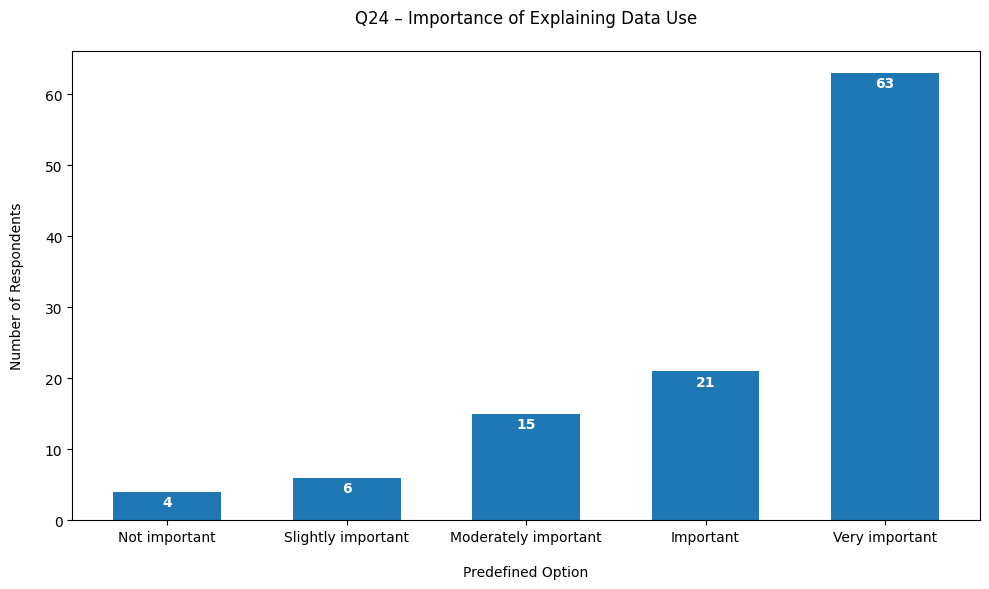

In [130]:
# Q24 – Importance of Explaining Data Use (Likert Scale)
# Not Setuped
# Not finished

qid = 'Q24'

# Map the Likert scale options to the DataFrame
df[f'{qid}_labeled'] = pd.Categorical(
    df[qid].map(likert_maps[qid]),
    categories=list(likert_maps[qid].values()),
    ordered=True
)

# Counts
counts = df[f'{qid}_labeled'].value_counts().sort_index()
percent = counts / len(df) * 100
likert_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(likert_results)
print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(likert_results.index, likert_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q24 – Importance of Explaining Data Use', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(likert_results['Count']):
    plt.text(i, v - 2, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q25
-----------------------
             Count    Percent
Q25                          
More likely     32  30.476190
Less likely      7   6.666667
No effect       52  49.523810
Not sure        14  13.333333
-----------------------
-----------------------

Other answers from Q25:
Im actually against the overly friendly conversation style of chatgpt. I much prefer clear and factual conversations.
So is the LLM gaslighting me to share me information? No thanks.
"If the data-scraping machine pretended to be a nice human, would you be more likely to surrender your soul to it?" 
Probably but inconsciously
-----------------------


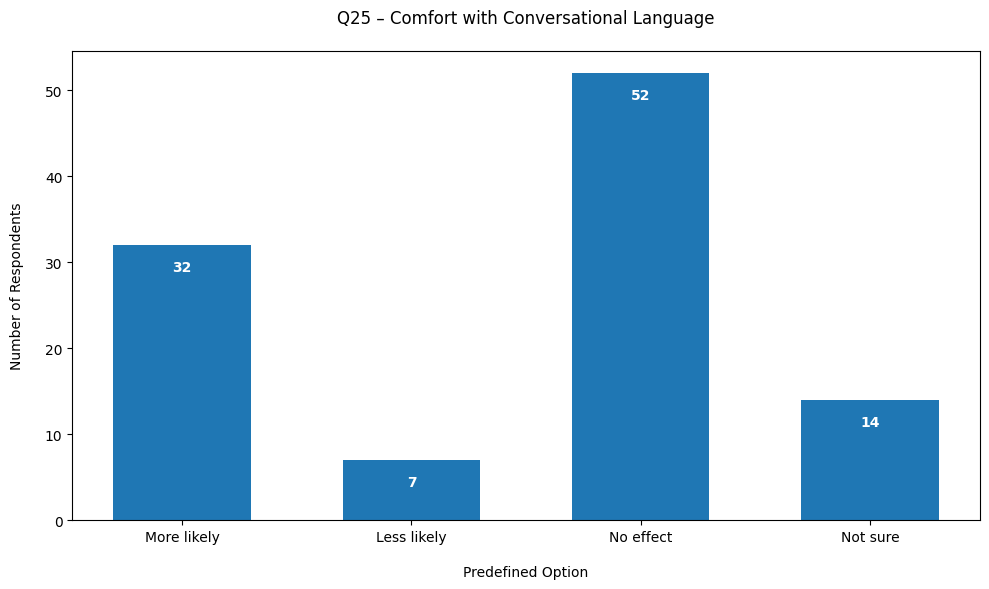

In [131]:
# Q25 – Comfort with Conversational Language (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q25'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print("-----------------------")
    print(f"\nOther answers from {qid}:")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q25 – Comfort with Conversational Language', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


In [132]:
# Q26 – Motivation to Continue Usage (Open-ended)
# Not Setuped
# Not finished

qid = 'Q26'

answers = df[qid].dropna().str.strip()
answers = answers[~answers.str.match(r'^[\.\,\-\/\s]*$')]

print(f"{len(answers)} responses for {qid}")

answers.to_csv(f"{qid}_cleaned.csv", index=False)


105 responses for Q26


Quantitative results for Q27
-----------------------
                                          Count    Percent
Q27                                                       
Yes, many times                              15  13.888889
Yes, sometimes                               39  36.111111
No, but I’ve used it for other topics        37  34.259259
No, I’ve never used tools like ChatGPT       10   9.259259
I’ve heard of them, but never tried them      7   6.481481
-----------------------

Other answers from Q27:
-----------------------
Yes, but for my cat. 


-----------------------


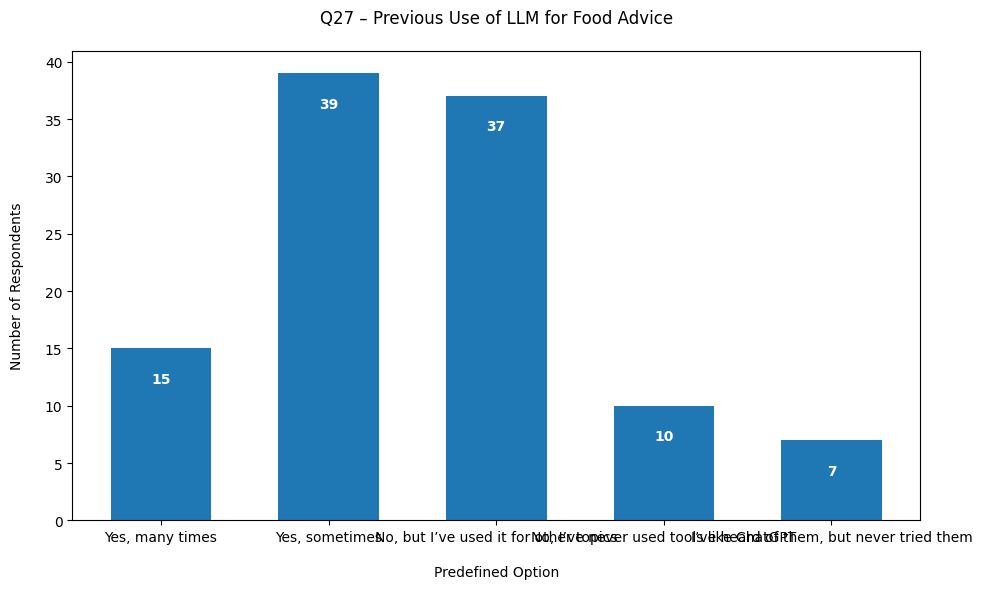

In [133]:
# Q27 – Previous Use of LLM for Food Advice (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q27'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q27 – Previous Use of LLM for Food Advice', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q28
-----------------------
     Count    Percent
Q28                  
Yes     54  49.541284
No      55  50.458716
-----------------------


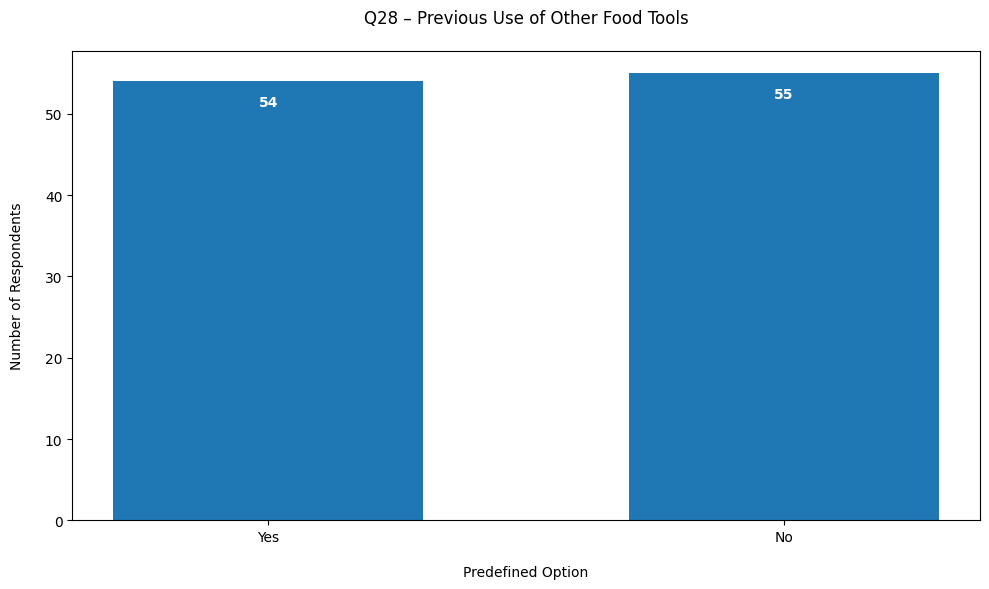

In [134]:
# Q28 – Previous Use of Other Food Tools (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q28'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print("-----------------------")
    print(f"\nOther answers from {qid}:")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q28 – Previous Use of Other Food Tools', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q29
-----------------------
                                                  Count    Percent
Q29                                                               
Yes, often                                            7   6.542056
Occasionally                                          7   6.542056
Rarely                                                9   8.411215
Never                                                27  25.233645
Not applicable / I don’t follow such preferences     57  53.271028
-----------------------

Other answers from Q29:
-----------------------
I don’t use these tools/apps
Never used any tools or apps
-----------------------


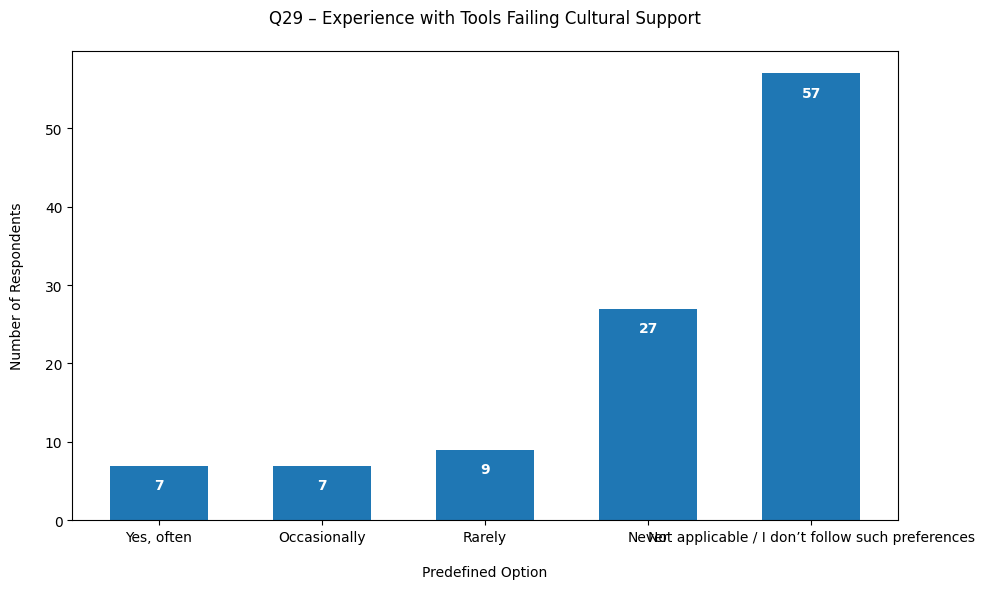

In [135]:
# Q29 – Experience with Tools Failing Cultural Support (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q29'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q29 – Experience with Tools Failing Cultural Support', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q30
-----------------------
          Count    Percent
Q30                       
Yes          24  23.529412
No           68  66.666667
Not sure     10   9.803922
-----------------------
-----------------------

Other answers from Q30:
I don't think stress affects my trust in AI-based food recommendations, mostly I just lack the time when i'm stressed or don't want to spend the time i have on that, but trust in AI is not because of stress, more on how my information and data is protected or shared, with AI in general. That wouldn't stop me from using an App with AI, but it had to be a convincing app,, just like others, which is hard to achieve (although AI sounds promising for that purpose)
Lost interest due to me not being so strict with food expectations.
Yes, but also because i met my goals without always chrcking the app
It wasn’t to complicated to interact, it just didn’t gave me the types of suggestions I craved. He keept giving healthy suggestions or “in

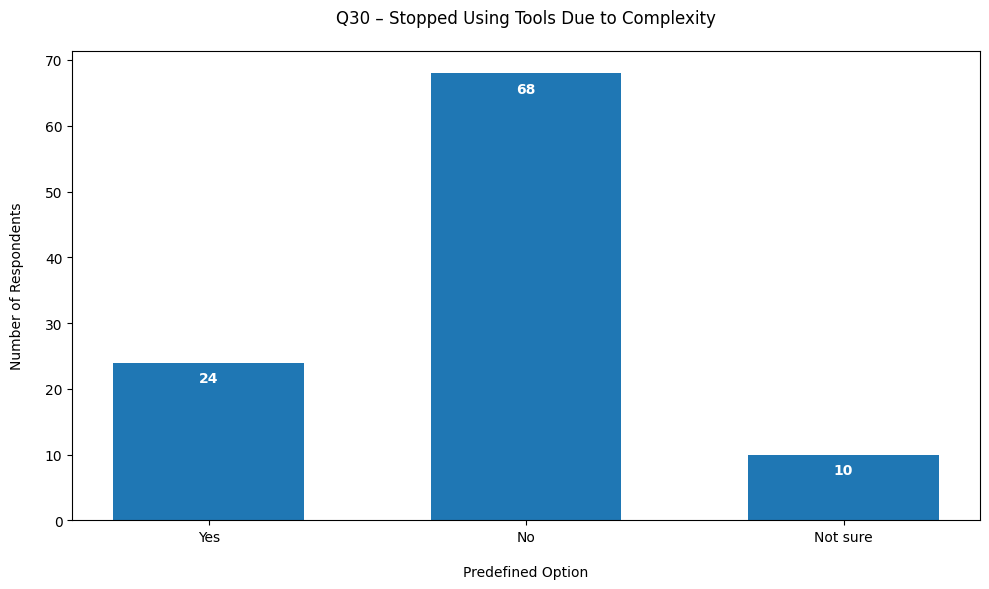

In [136]:
# Q30 – Stopped Using Tools Due to Complexity (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q30'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print("-----------------------")
    print(f"\nOther answers from {qid}:")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q30 – Stopped Using Tools Due to Complexity', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q31
-----------------------
                                               Count    Percent
Q31                                                            
A chat-style conversation                         18  16.981132
A form where I fill in options and get advice     12  11.320755
A mix of both                                     67  63.207547
Not sure                                           9   8.490566
-----------------------

Other answers from Q31:
-----------------------
Chat style, but clear and factual.
Well, for each case I can use free LLMs to have a food advice. If I want to read text then I opt for a free LLM than wasting time with an app. It would be more intresting if there would be images, intraction, etc to make it fell less like a ChatGPT rip off
No AI involvement. 
-----------------------


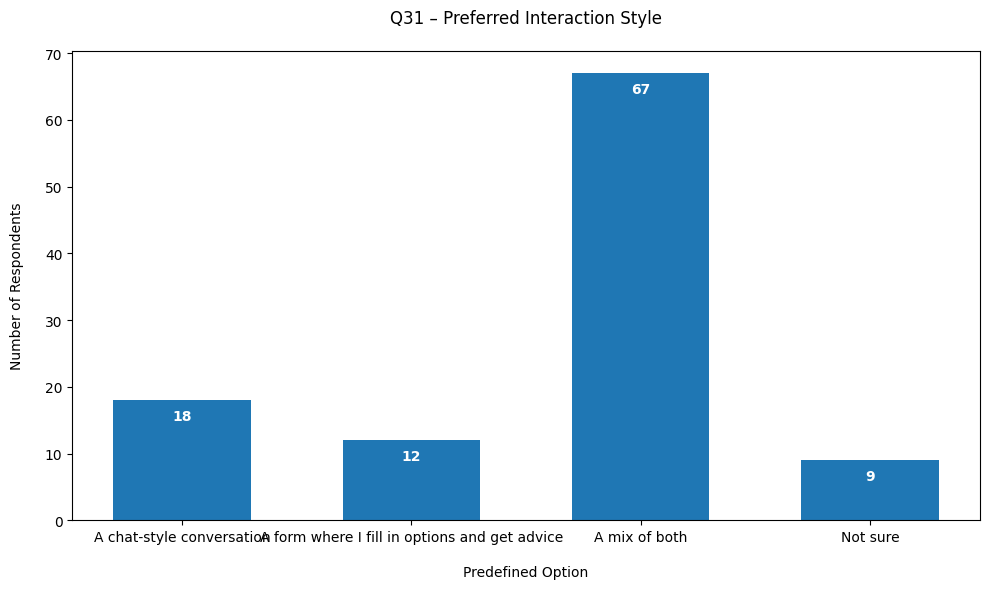

In [137]:
# Q31 – Preferred Interaction Style (Multiple Choice)
# Not Setuped
# Not finished

qid = 'Q31'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered.reindex(official_options_map[qid], fill_value=0)
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others.index:
        print(answer)

    pd.DataFrame({'Others:': list(others.index)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q31 – Preferred Interaction Style', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q32
-----------------------
                      Count    Percent
Q32_labeled                           
Not confident at all      2   1.769912
Slightly confident        9   7.964602
Moderately confident     24  21.238938
Confident                43  38.053097
Very confident           31  27.433628
-----------------------


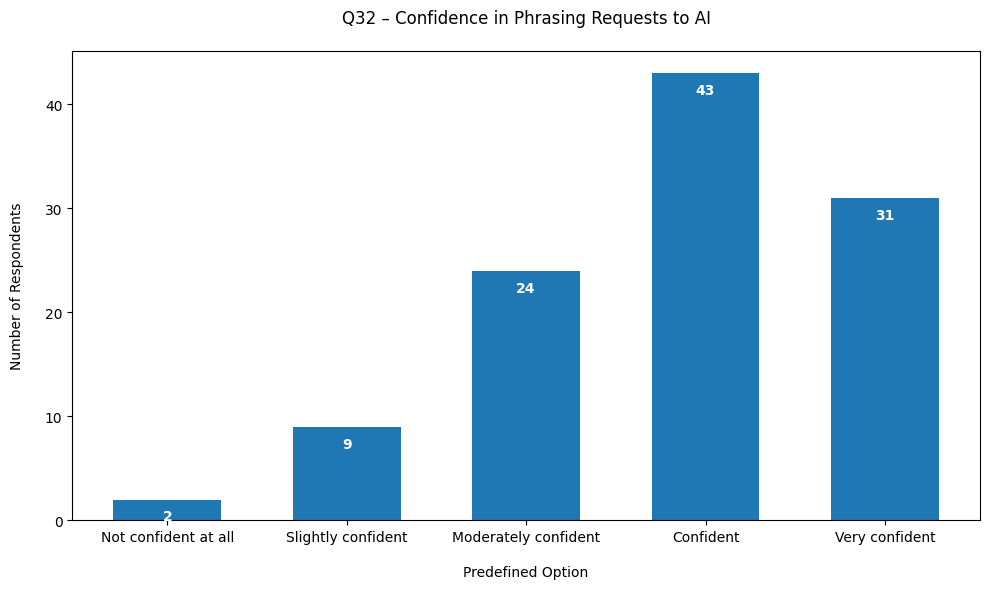

In [138]:
# Q32 – Confidence in Phrasing Requests to AI (Likert Scale)
# Not Setuped
# Not finished

qid = 'Q32'

# Map the Likert scale options to the DataFrame
df[f'{qid}_labeled'] = pd.Categorical(
    df[qid].map(likert_maps[qid]),
    categories=list(likert_maps[qid].values()),
    ordered=True
)

# Counts
counts = df[f'{qid}_labeled'].value_counts().sort_index()
percent = counts / len(df) * 100
likert_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(likert_results)
print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(likert_results.index, likert_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q32 – Confidence in Phrasing Requests to AI', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(likert_results['Count']):
    plt.text(i, v - 2, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q33
-----------------------
                                                    Count    Percent
A helpful conversation that asks clarifying que...     58  51.327434
Easy ways to adjust or rewrite my request              56  49.557522
Automatic suggestions based on my situation, li...     43  38.053097
Pre-written templates to show how to ask a ques...     42  37.168142
Step-by-step help for making a request                 36  31.858407
-----------------------

Other answers from Q33:
-----------------------

No AI involvement. 
-----------------------


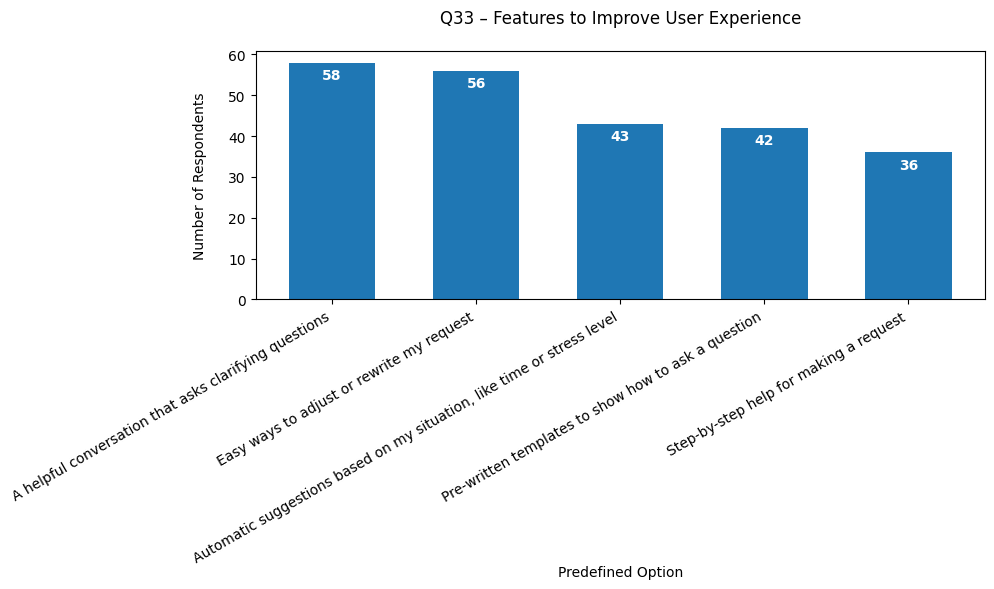

In [139]:
# Q33 – Features to Improve User Experience (Checkboxes)
# Not Setuped
# Not finished

qid = 'Q33'

filtered, others = process_checkbox(qid, official_options_map[qid])

# Add dummies to the original DataFrame
df = pd.concat([df, filtered], axis=1)

# Count the number of respondents who selected at least one predefined option
respondents_predefined = (filtered.sum(axis=1) > 0).sum()

# Counts
counts = filtered.sum().sort_values(ascending=False)
percent = counts / len(df) * 100
cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(cb_results)
print("-----------------------")

print(f"\nOther answers from {qid}:")
print("-----------------------")
for answer in others:
    print(answer)

pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(cb_results.index, cb_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q33 – Features to Improve User Experience', pad=20)
plt.xlabel('Predefined Option', labelpad=0)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=30, ha='right')

# Add values on bars
for i, v in enumerate(cb_results['Count']):
    plt.text(i, v - 4, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q34
-----------------------
             Count    Percent
Q34_labeled                  
Not at all       8   7.079646
Slightly         9   7.964602
Moderately      32  28.318584
Very            27  23.893805
Very much       33  29.203540
-----------------------


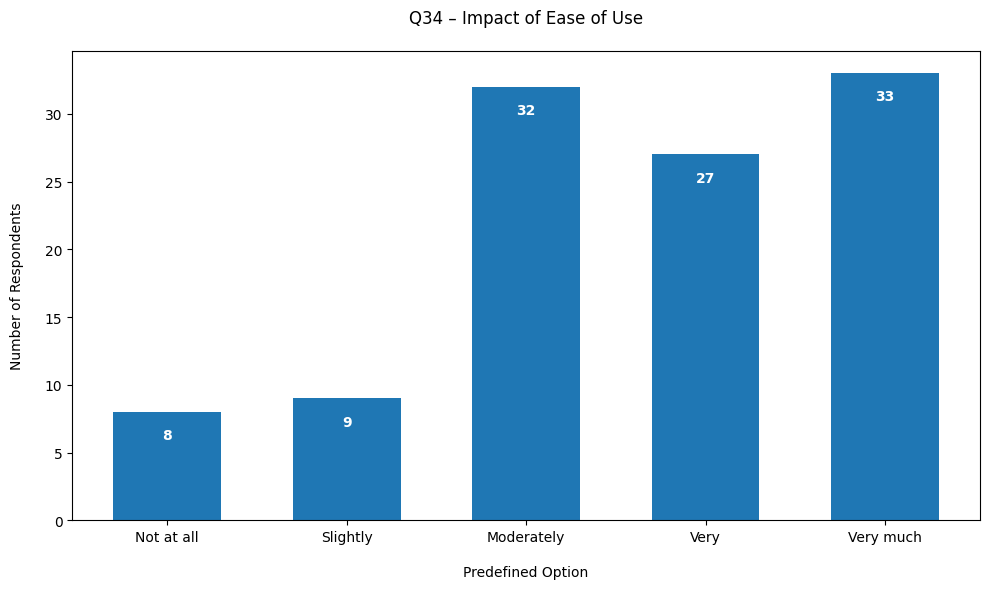

In [140]:
# Q34 – Impact of Ease of Use (Likert Scale)
# Not Setuped
# Not finished

qid = 'Q34'

# Map the Likert scale options to the DataFrame
df[f'{qid}_labeled'] = pd.Categorical(
    df[qid].map(likert_maps[qid]),
    categories=list(likert_maps[qid].values()),
    ordered=True
)

# Counts
counts = df[f'{qid}_labeled'].value_counts().sort_index()
percent = counts / len(df) * 100
likert_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(likert_results)
print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(likert_results.index, likert_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q34 – Impact of Ease of Use', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(likert_results['Count']):
    plt.text(i, v - 2, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q35
-----------------------
                                   Count    Percent
Rephrase my request and try again     80  70.796460
Ask a follow-up to clarify            49  43.362832
Stop using it and look elsewhere      16  14.159292
Not sure                               2   1.769912
-----------------------

Other answers from Q35:
-----------------------

Not use AI. 
If it is a very long recommendation I would stop using it. If it was short and asking if this was really what I wanted, then gave me a  more thorough recommendation, that would be best
If it kept giving me the same unhelpful information 3 times in a row I would stop using it.
-----------------------


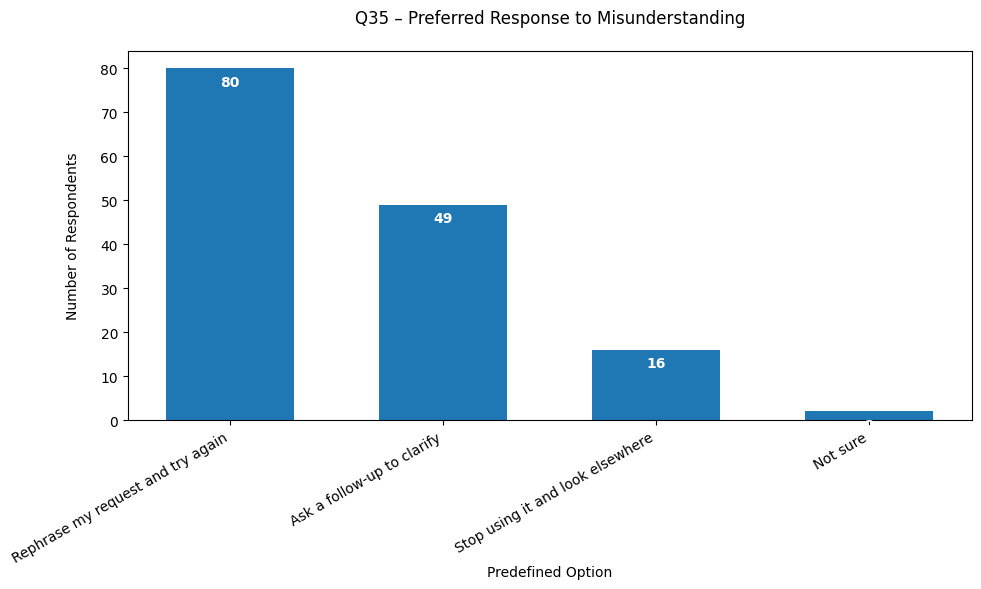

In [141]:
# Q35 – Preferred Response to Misunderstanding (Checkboxes)
# Not Setuped
# Not finished

qid = 'Q35'

filtered, others = process_checkbox(qid, official_options_map[qid])

# Add dummies to the original DataFrame
df = pd.concat([df, filtered], axis=1)

# Count the number of respondents who selected at least one predefined option
respondents_predefined = (filtered.sum(axis=1) > 0).sum()

# Counts
counts = filtered.sum().sort_values(ascending=False)
percent = counts / len(df) * 100
cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(cb_results)
print("-----------------------")

if len(others) > 0:
    print(f"\nOther answers from {qid}:")
    print("-----------------------")
    for answer in others:
        print(answer)

    pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(cb_results.index, cb_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q35 – Preferred Response to Misunderstanding', pad=20)
plt.xlabel('Predefined Option', labelpad=0)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=30, ha='right')

# Add values on bars
for i, v in enumerate(cb_results['Count']):
    plt.text(i, v - 4, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


In [142]:
# Q36 – Desired Improvements (Open-ended)
# Not Setuped
# Not finished

qid = 'Q36'

answers = df[qid].dropna().str.strip()
answers = answers[~answers.str.match(r'^[\.\,\-\/\s]*$')]

print(f"{len(answers)} responses for {qid}")

answers.to_csv(f"{qid}_cleaned.csv", index=False)


87 responses for Q36


In [143]:
# Q37 – Concerns or Reasons for Avoidance (Open-ended)
# Not Setuped
# Not finished

qid = 'Q37'

answers = df[qid].dropna().str.strip()
answers = answers[~answers.str.match(r'^[\.\,\-\/\s]*$')]

print(f"{len(answers)} responses for {qid}")

answers.to_csv(f"{qid}_cleaned.csv", index=False)


101 responses for Q37


In [144]:
# Q38 – Final Thoughts (Open-ended)
# Not Setuped
# Not finished

qid = 'Q38'

answers = df[qid].dropna().str.strip()
answers = answers[~answers.str.match(r'^[\.\,\-\/\s]*$')]

print(f"{len(answers)} responses for {qid}")

answers.to_csv(f"{qid}_cleaned.csv", index=False)


31 responses for Q38


In [145]:
# -------- END -------- #

Q9_labeled   Not difficult at all  Slightly difficult  Moderately difficult  \
Q1                                                                            
21 – 23                         1                   9                     7   
24 – 26                         5                  11                    11   
27 or older                     3                   3                     8   
Under 20                        2                   2                     0   

Q9_labeled   Very difficult  Extremely difficult  
Q1                                                
21 – 23                   5                    2  
24 – 26                  13                    8  
27 or older               9                    5  
Under 20                  4                    1  
Q9_labeled   Not difficult at all  Slightly difficult  Moderately difficult  \
Q1                                                                            
21 – 23                  4.166667           37.500000        

<Axes: title={'center': 'Q1 vs Q9 - Difficulty Maintaining Healthy Eating by Age'}, xlabel='Q1'>

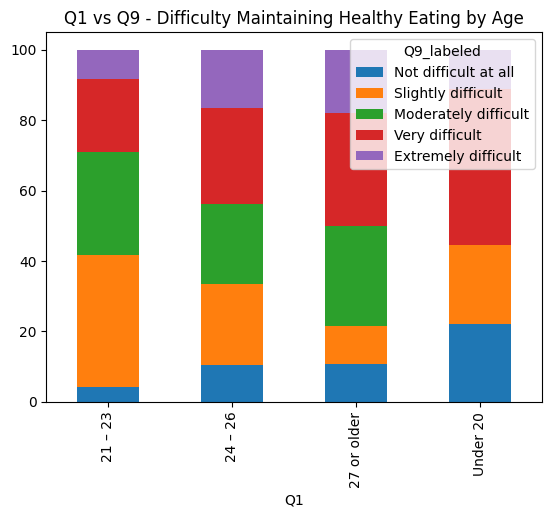

In [146]:
# Q1 vs Q9 - Difficulty Maintaining Healthy Eating by Age

cross = pd.crosstab(df['Q1'], df['Q9_labeled'])
print(cross)

# Optional: normalize to percentages
cross_pct = cross.div(cross.sum(axis=1), axis=0) * 100
print(cross_pct)

cross_pct.plot(kind='bar', stacked=True, title='Q1 vs Q9 - Difficulty Maintaining Healthy Eating by Age')


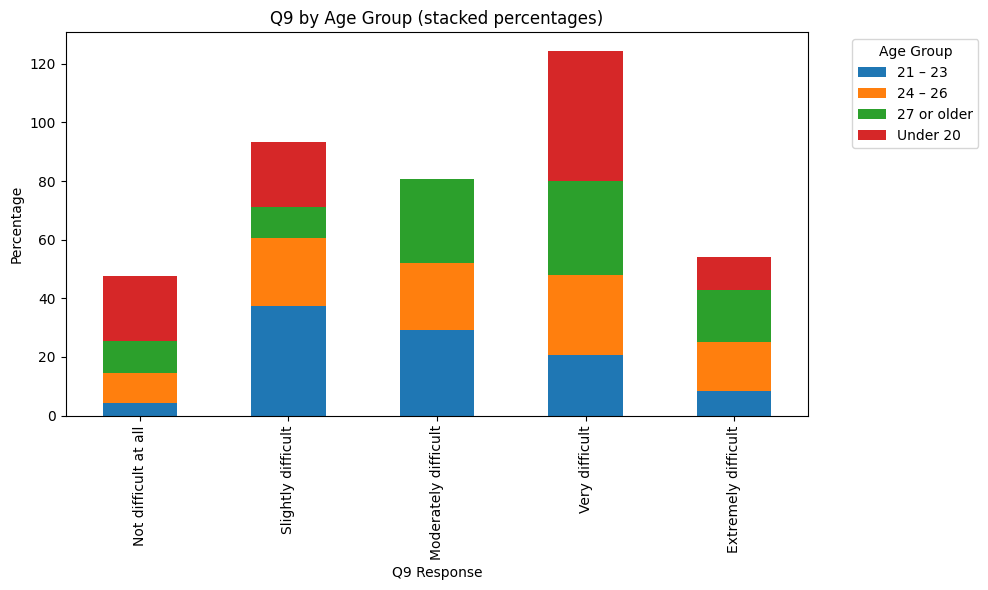

In [147]:
# Usable

cross_pct.T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Q9 by Age Group (stacked percentages)')
plt.ylabel('Percentage')
plt.xlabel('Q9 Response')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


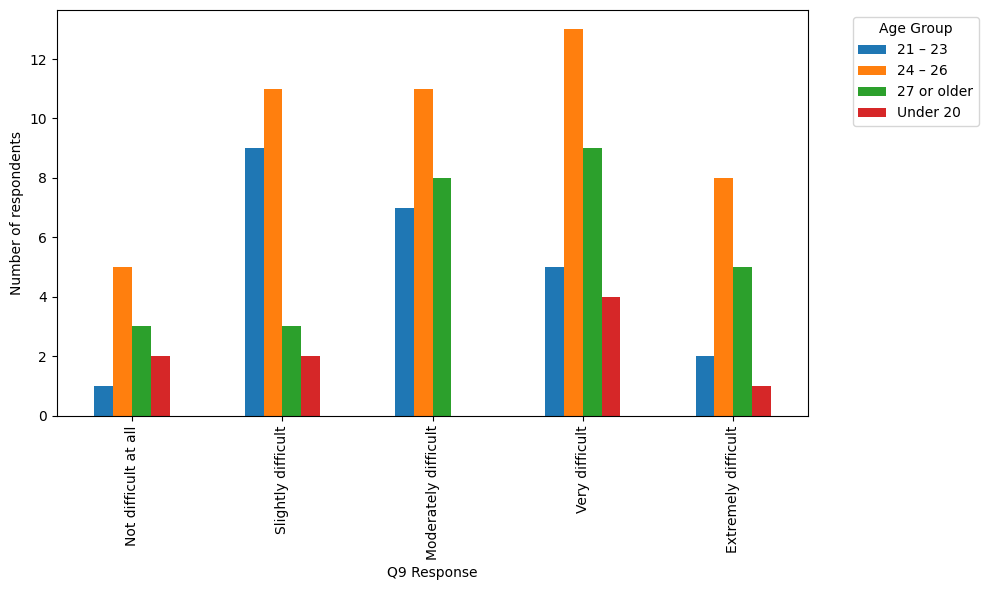

In [148]:
# Usable

cross.T.plot(kind='bar', figsize=(10,6))
plt.ylabel('Number of respondents')
plt.xlabel('Q9 Response')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


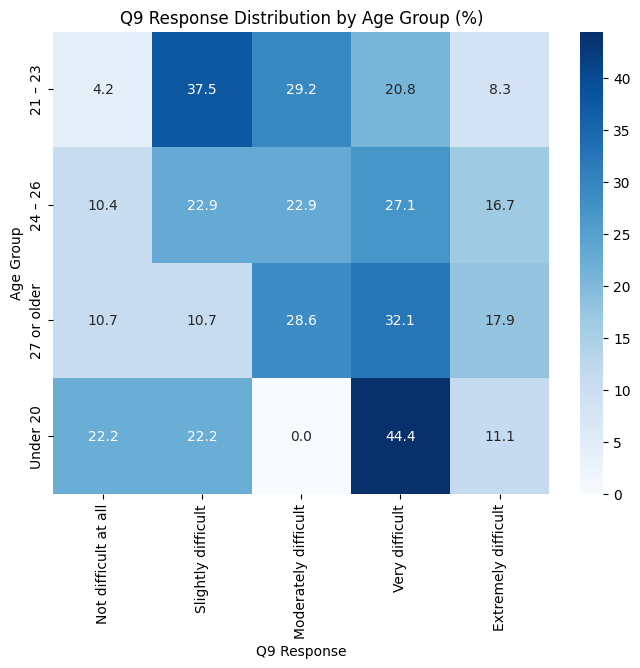

In [149]:
# Usable

plt.figure(figsize=(8,6))
sns.heatmap(cross_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title('Q9 Response Distribution by Age Group (%)')
plt.ylabel('Age Group')
plt.xlabel('Q9 Response')
plt.show()


In [150]:
# Slice columns starting from index 37
df_subset = df.iloc[:, 34:]

# Now get info for that subset
df_subset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 67 columns):
 #   Column                                                                  Non-Null Count  Dtype   
---  ------                                                                  --------------  -----   
 0   Q35                                                                     109 non-null    object  
 1   Q36                                                                     107 non-null    object  
 2   Q37                                                                     109 non-null    object  
 3   Q38                                                                     37 non-null     object  
 4   Q7_labeled                                                              109 non-null    category
 5   I skip meals                                                            113 non-null    int64   
 6   I crave unhealthy or comfort food                                       11